In [736]:
import os
import re
import json
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [742]:
# data frame skeletons to parse and plot using pandas
# *ts is denoted as nano seconds, the timestamp collected is: `time.Now().UnixNano()`

ttprList = {
    "barrierbootstrapping0": {
        "val": [],
        "ts": []
    },
    "barrierprovider-records1": {
        "val": [],
        "ts": []
    },
    "barrierprovider-records2": {
        "val": [],
        "ts": []
    },
    "full-bootstrapping0": {
        "val": [],
        "ts": []
    },
    "full-provider-records1": {
        "val": [],
        "ts": []
    },
    "full-provider-records2": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "peers-found|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "peers-missing|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "signal-bootstrapping0": {
        "val": [],
        "ts": []
    },
    "signal-provider-records1": {
        "val": [],
        "ts": []
    },
    "signal-provider-records2": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find-first|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find-last|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "time-to-find|done|cypress-provider|9": {
        "val": [],
        "ts": []
    },
    "time-to-provide-0": {
        "val": [],
        "ts": []
    },
    "time-to-provide-1": {
        "val": [],
        "ts": []
    },
    "time-to-provide-10": {
        "val": [],
        "ts": []
    },
    "time-to-provide-11": {
        "val": [],
        "ts": []
    },
    "time-to-provide-12": {
        "val": [],
        "ts": []
    },
    "time-to-provide-13": {
        "val": [],
        "ts": []
    },
    "time-to-provide-14": {
        "val": [],
        "ts": []
    },
    "time-to-provide-15": {
        "val": [],
        "ts": []
    },
    "time-to-provide-16": {
        "val": [],
        "ts": []
    },
    "time-to-provide-17": {
        "val": [],
        "ts": []
    },
    "time-to-provide-18": {
        "val": [],
        "ts": []
    },
    "time-to-provide-19": {
        "val": [],
        "ts": []
    },
    "time-to-provide-2": {
        "val": [],
        "ts": []
    },
    "time-to-provide-3": {
        "val": [],
        "ts": []
    },
    "time-to-provide-4": {
        "val": [],
        "ts": []
    },
    "time-to-provide-5": {
        "val": [],
        "ts": []
    },
    "time-to-provide-6": {
        "val": [],
        "ts": []
    },
    "time-to-provide-7": {
        "val": [],
        "ts": []
    },
    "time-to-provide-8": {
        "val": [],
        "ts": []
    },
    "time-to-provide-9": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|0": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|1": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|10": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|11": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|12": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|13": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|14": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|15": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|16": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|17": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|18": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|19": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|2": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|3": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|4": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|5": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|6": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|7": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|8": {
        "val": [],
        "ts": []
    },
    "num-hops|cypress-provider|9": {
        "val": [],
        "ts": []
    }
}

bandwidthStatsList = {
    "node0": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node1": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node2": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node3": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node4": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node5": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node6": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node7": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node8": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node9": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node10": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node11": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node12": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node13": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node14": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node15": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node16": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node17": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node18": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node19": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node20": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node21": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node22": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node23": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node24": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node25": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node26": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node27": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node28": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node29": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node30": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node31": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node32": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node33": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node34": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node35": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node36": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node37": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node38": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node39": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node40": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node41": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node42": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node43": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node44": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node45": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node46": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node47": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node48": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    },
    "node49": {
        "bandwidthTotalIn": [],
        "tsTotalIn": [],
        "bandwidthTotalOut": [],
        "tsTotalOut": [],
        "bandwidthRateIn": [],
        "tsRateIn": [],
        "bandwidthRateOut": [],
        "rsRateOut": []
    }
}

nodeCpuUsage = {
    "node0": [],
    "node1": [],
    "node2": [],
    "node3": [],
    "node4": [],
    "node5": [],
    "node6": [],
    "node7": [],
    "node8": [],
    "node9": [],
    "node10": [],
    "node11": [],
    "node12": [],
    "node13": [],
    "node14": [],
    "node15": [],
    "node16": [],
    "node17": [],
    "node18": [],
    "node19": [],
    "node20": [],
    "node21": [],
    "node22": [],
    "node23": [],
    "node24": [],
    "node25": [],
    "node26": [],
    "node27": [],
    "node28": [],
    "node29": [],
    "node30": [],
    "node31": [],
    "node32": [],
    "node33": [],
    "node34": [],
    "node35": [],
    "node36": [],
    "node37": [],
    "node38": [],
    "node39": [],
    "node40": [],
    "node41": [],
    "node42": [],
    "node43": [],
    "node44": [],
    "node45": [],
    "node46": [],
    "node47": [],
    "node48": [],
    "node49": []
}

diagnosticsList = {
    "EnableGC": {
        "val": [],
        "ts": []
    },
    "HeapAlloc": {
        "val": [],
        "ts": []
    },
    "LastGC": {
        "val": [],
        "ts": []
    },
    "NumGC": {
        "val": [],
        "ts": []
    },
    "MCacheSys": {
        "val": [],
        "ts": []
    },
#     "PauseNs": [],
    "StackSys": {
        "val": [],
        "ts": []
    },
#     "ReadMemStats": [],
    "StackInuse": {
        "val": [],
        "ts": []
    },
    "Sys": {
        "val": [],
        "ts": []
    },
    "NumThread": {
        "val": [],
        "ts": []
    },
    "HeapIdle": {
        "val": [],
        "ts": []
    },
    "HeapInuse": {
        "val": [],
        "ts": []
    },
    "Lookups": {
        "val": [],
        "ts": []
    },
    "MSpanInuse": {
        "val": [],
        "ts": []
    },
    "Frees": {
        "val": [],
        "ts": []
    },
    "NextGC": {
        "val": [],
        "ts": []
    },
    "NumCgoCall": {
        "val": [],
        "ts": []
    },
    "PauseTotalNs": {
        "val": [],
        "ts": []
    },
    "NumGoroutine": {
        "val": [],
        "ts": []
    },
    "BuckHashSys": {
        "val": [],
        "ts": []
    },
    "HeapObjects": {
        "val": [],
        "ts": []
    },
    "GCCPUFraction": {
        "val": [],
        "ts": []
    },
    "TotalAlloc": {
        "val": [],
        "ts": []
    },
    "DebugGC": {
        "val": [],
        "ts": []
    },
    "HeapReleased": {
        "val": [],
        "ts": []
    },
    "HeapSys": {
        "val": [],
        "ts": []
    },
    "MCacheInuse": {
        "val": [],
        "ts": []
    },
    "Alloc": {
        "val": [],
        "ts": []
    },
    "Mallocs": {
        "val": [],
        "ts": []
    },
    "MSpanSys": {
        "val": [],
        "ts": []
    },
    "pauseNs": {
        "ts": [],
        "count" : [],
        "max": [],
        "mean": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    },
    "readMemStats": {
        "ts": [],
        "count" : [],
        "m1": [],
        "m15": [],
        "m5": [],
        "max": [],
        "mean": [],
        "meanrate": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    }
}


# convenience methods
def resetListVars():
    global diagnosticsList
    diagnosticsList = {
        "EnableGC": {
            "val": [],
            "ts": []
        },
        "HeapAlloc": {
            "val": [],
            "ts": []
        },
        "LastGC": {
            "val": [],
            "ts": []
        },
        "NumGC": {
            "val": [],
            "ts": []
        },
        "MCacheSys": {
            "val": [],
            "ts": []
        },
    #     "PauseNs": [],
        "StackSys": {
            "val": [],
            "ts": []
        },
    #     "ReadMemStats": [],
        "StackInuse": {
            "val": [],
            "ts": []
        },
        "Sys": {
            "val": [],
            "ts": []
        },
        "NumThread": {
            "val": [],
            "ts": []
        },
        "HeapIdle": {
            "val": [],
            "ts": []
        },
        "HeapInuse": {
            "val": [],
            "ts": []
        },
        "Lookups": {
            "val": [],
            "ts": []
        },
        "MSpanInuse": {
            "val": [],
            "ts": []
        },
        "Frees": {
            "val": [],
            "ts": []
        },
        "NextGC": {
            "val": [],
            "ts": []
        },
        "NumCgoCall": {
            "val": [],
            "ts": []
        },
        "PauseTotalNs": {
            "val": [],
            "ts": []
        },
        "NumGoroutine": {
            "val": [],
            "ts": []
        },
        "BuckHashSys": {
            "val": [],
            "ts": []
        },
        "HeapObjects": {
            "val": [],
            "ts": []
        },
        "GCCPUFraction": {
            "val": [],
            "ts": []
        },
        "TotalAlloc": {
            "val": [],
            "ts": []
        },
        "DebugGC": {
            "val": [],
            "ts": []
        },
        "HeapReleased": {
            "val": [],
            "ts": []
        },
        "HeapSys": {
            "val": [],
            "ts": []
        },
        "MCacheInuse": {
            "val": [],
            "ts": []
        },
        "Alloc": {
            "val": [],
            "ts": []
        },
        "Mallocs": {
            "val": [],
            "ts": []
        },
        "MSpanSys": {
            "val": [],
            "ts": []
        },
        "pauseNs": {
            "ts": [],
            "count" : [],
            "max": [],
            "mean": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        },
        "readMemStats": {
            "ts": [],
            "count" : [],
            "m1": [],
            "m15": [],
            "m5": [],
            "max": [],
            "mean": [],
            "meanrate": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        }
    }
    return

# convenience methods
def resetTtprList():
    global ttprList
    ttprList = {
        "barrierbootstrapping0": {
            "val": [],
            "ts": []
        },
        "barrierprovider-records1": {
            "val": [],
            "ts": []
        },
        "barrierprovider-records2": {
            "val": [],
            "ts": []
        },
        "full-bootstrapping0": {
            "val": [],
            "ts": []
        },
        "full-provider-records1": {
            "val": [],
            "ts": []
        },
        "full-provider-records2": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "peers-found|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "peers-missing|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "signal-bootstrapping0": {
            "val": [],
            "ts": []
        },
        "signal-provider-records1": {
            "val": [],
            "ts": []
        },
        "signal-provider-records2": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find-first|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find-last|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "time-to-find|done|cypress-provider|9": {
            "val": [],
            "ts": []
        },
        "time-to-provide-0": {
            "val": [],
            "ts": []
        },
        "time-to-provide-1": {
            "val": [],
            "ts": []
        },
        "time-to-provide-10": {
            "val": [],
            "ts": []
        },
        "time-to-provide-11": {
            "val": [],
            "ts": []
        },
        "time-to-provide-12": {
            "val": [],
            "ts": []
        },
        "time-to-provide-13": {
            "val": [],
            "ts": []
        },
        "time-to-provide-14": {
            "val": [],
            "ts": []
        },
        "time-to-provide-15": {
            "val": [],
            "ts": []
        },
        "time-to-provide-16": {
            "val": [],
            "ts": []
        },
        "time-to-provide-17": {
            "val": [],
            "ts": []
        },
        "time-to-provide-18": {
            "val": [],
            "ts": []
        },
        "time-to-provide-19": {
            "val": [],
            "ts": []
        },
        "time-to-provide-2": {
            "val": [],
            "ts": []
        },
        "time-to-provide-3": {
            "val": [],
            "ts": []
        },
        "time-to-provide-4": {
            "val": [],
            "ts": []
        },
        "time-to-provide-5": {
            "val": [],
            "ts": []
        },
        "time-to-provide-6": {
            "val": [],
            "ts": []
        },
        "time-to-provide-7": {
            "val": [],
            "ts": []
        },
        "time-to-provide-8": {
            "val": [],
            "ts": []
        },
        "time-to-provide-9": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|0": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|1": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|10": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|11": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|12": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|13": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|14": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|15": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|16": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|17": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|18": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|19": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|2": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|3": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|4": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|5": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|6": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|7": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|8": {
            "val": [],
            "ts": []
        },
        "num-hops|cypress-provider|9": {
            "val": [],
            "ts": []
        }
    }
    return

def resetBandwidthStatsList():
    global bandwidthStatsList
    bandwidthStatsList = {
        "node0": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node1": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node2": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node3": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node4": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node5": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node6": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node7": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node8": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node9": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node10": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node11": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node12": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node13": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node14": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node15": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node16": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node17": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node18": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node19": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node20": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node21": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node22": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node23": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node24": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node25": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node26": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node27": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node28": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node29": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node30": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node31": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node32": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node33": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node34": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node35": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node36": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node37": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node38": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node39": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node40": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node41": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node42": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node43": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node44": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node45": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node46": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node47": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node48": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        },
        "node49": {
            "bandwidthTotalIn": [],
            "tsTotalIn": [],
            "bandwidthTotalOut": [],
            "tsTotalOut": [],
            "bandwidthRateIn": [],
            "tsRateIn": [],
            "bandwidthRateOut": [],
            "rsRateOut": []
        }
    }
    return

# def resetBandwidthStats():
#     global bandwidthStats = []
#     return

# def resetNodeDiagnostics():
#     global nodeDiagnostics

In [747]:
bandwidthStats = []
### Parser and data collection sorting for file: results.out
def parseResults(runId, path, filename, numNodes):
    for i in range(nodeNum):
#         print(path+str(i)+filename)
        with open(path+str(i)+filename, 'r') as f:
            lines = f.readlines()
        #     print(len(lines))
            for j in range(len(lines)):
#                 print(lines[j])
                l = json.loads(lines[j])
#                 print(l["name"])
#                 print(l["measures"]["value"])
                # let's make a new dictionary for the values loaded by the files
                # compile everything into one array
                # be able to easily read the file and run calculations for the run tests
                if l["name"] == "barrierbootstrapping0":
                    ttprList["barrierbootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["barrierbootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "barrierprovider-records1":
                    ttprList["barrierprovider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["barrierprovider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "barrierprovider-records2":
                    ttprList["barrierprovider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["barrierprovider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "full bootstrapping0":
                    ttprList["full-bootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["full-bootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "full provider-records1":
                    ttprList["full-provider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["full-provider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "full provider-records2":
                    ttprList["full-provider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["full-provider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|0":
                    ttprList["peers-found|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|1":
                    ttprList["peers-found|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|10":
                    ttprList["peers-found|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|11":
                    ttprList["peers-found|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|12":
                    ttprList["peers-found|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|13":
                    ttprList["peers-found|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|14":
                    ttprList["peers-found|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|15":
                    ttprList["peers-found|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|16":
                    ttprList["peers-found|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|17":
                    ttprList["peers-found|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|18":
                    ttprList["peers-found|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|19":
                    ttprList["peers-found|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|2":
                    ttprList["peers-found|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|3":
                    ttprList["peers-found|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|4":
                    ttprList["peers-found|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|5":
                    ttprList["peers-found|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|6":
                    ttprList["peers-found|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|7":
                    ttprList["peers-found|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|8":
                    ttprList["peers-found|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "peers-found|done|cypress-provider|9":
                    ttprList["peers-found|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["peers-found|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|0":
                    ttprList["peers-missing|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|1":
                    ttprList["peers-missing|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|10":
                    ttprList["peers-missing|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|11":
                    ttprList["peers-missing|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|12":
                    ttprList["peers-missing|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|13":
                    ttprList["peers-missing|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|14":
                    ttprList["peers-missing|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|15":
                    ttprList["peers-missing|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|16":
                    ttprList["peers-missing|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|17":
                    ttprList["peers-missing|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|18":
                    ttprList["peers-missing|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|19":
                    ttprList["peers-missing|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|2":
                    ttprList["peers-missing|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|3":
                    ttprList["peers-missing|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|4":
                    ttprList["peers-missing|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|5":
                    ttprList["peers-missing|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|6":
                    ttprList["peers-missing|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|7":
                    ttprList["peers-missing|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|8":
                    ttprList["peers-missing|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "peers-missing|done|cypress-provider|9":
                    ttprList["peers-missing|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["peers-missing|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "signal bootstrapping0":
                    ttprList["signal-bootstrapping0"]["val"].append(l["measures"]["value"])
                    ttprList["signal-bootstrapping0"]["ts"].append(l["ts"])
                elif l["name"] == "signal provider-records1":
                    ttprList["signal-provider-records1"]["val"].append(l["measures"]["value"])
                    ttprList["signal-provider-records1"]["ts"].append(l["ts"])
                elif l["name"] == "signal provider-records2":
                    ttprList["signal-provider-records2"]["val"].append(l["measures"]["value"])
                    ttprList["signal-provider-records2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|0":
                    ttprList["time-to-find-first|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|1":
                    ttprList["time-to-find-first|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|10":
                    ttprList["time-to-find-first|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|11":
                    ttprList["time-to-find-first|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|12":
                    ttprList["time-to-find-first|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|13":
                    ttprList["time-to-find-first|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|14":
                    ttprList["time-to-find-first|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|15":
                    ttprList["time-to-find-first|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|16":
                    ttprList["time-to-find-first|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|17":
                    ttprList["time-to-find-first|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|18":
                    ttprList["time-to-find-first|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|19":
                    ttprList["time-to-find-first|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|2":
                    ttprList["time-to-find-first|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|3":
                    ttprList["time-to-find-first|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|4":
                    ttprList["time-to-find-first|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|5":
                    ttprList["time-to-find-first|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|6":
                    ttprList["time-to-find-first|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|7":
                    ttprList["time-to-find-first|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|8":
                    ttprList["time-to-find-first|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-first|cypress-provider|9":
                    ttprList["time-to-find-first|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-first|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|0":
                    ttprList["time-to-find-last|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|1":
                    ttprList["time-to-find-last|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|10":
                    ttprList["time-to-find-last|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|11":
                    ttprList["time-to-find-last|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|12":
                    ttprList["time-to-find-last|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|13":
                    ttprList["time-to-find-last|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|14":
                    ttprList["time-to-find-last|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|15":
                    ttprList["time-to-find-last|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|16":
                    ttprList["time-to-find-last|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|17":
                    ttprList["time-to-find-last|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|18":
                    ttprList["time-to-find-last|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|19":
                    ttprList["time-to-find-last|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|2":
                    ttprList["time-to-find-last|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|3":
                    ttprList["time-to-find-last|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|4":
                    ttprList["time-to-find-last|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|5":
                    ttprList["time-to-find-last|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|6":
                    ttprList["time-to-find-last|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|7":
                    ttprList["time-to-find-last|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|8":
                    ttprList["time-to-find-last|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find-last|done|cypress-provider|9":
                    ttprList["time-to-find-last|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find-last|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|0":
                    ttprList["time-to-find|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|1":
                    ttprList["time-to-find|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|10":
                    ttprList["time-to-find|done|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|11":
                    ttprList["time-to-find|done|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|12":
                    ttprList["time-to-find|done|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|13":
                    ttprList["time-to-find|done|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|14":
                    ttprList["time-to-find|done|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|15":
                    ttprList["time-to-find|done|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|16":
                    ttprList["time-to-find|done|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|17":
                    ttprList["time-to-find|done|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|18":
                    ttprList["time-to-find|done|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|19":
                    ttprList["time-to-find|done|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|0":
                    ttprList["time-to-find|done|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|1":
                    ttprList["time-to-find|done|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|2":
                    ttprList["time-to-find|done|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|3":
                    ttprList["time-to-find|done|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|4":
                    ttprList["time-to-find|done|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|5":
                    ttprList["time-to-find|done|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|6":
                    ttprList["time-to-find|done|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|7":
                    ttprList["time-to-find|done|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|8":
                    ttprList["time-to-find|done|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-find|done|cypress-provider|9":
                    ttprList["time-to-find|done|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-find|done|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-0":
                    ttprList["time-to-provide-0"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-0"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-1":
                    ttprList["time-to-provide-1"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-1"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-10":
                    ttprList["time-to-provide-10"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-10"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-11":
                    ttprList["time-to-provide-11"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-11"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-12":
                    ttprList["time-to-provide-12"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-12"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-13":
                    ttprList["time-to-provide-13"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-13"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-14":
                    ttprList["time-to-provide-14"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-14"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-15":
                    ttprList["time-to-provide-15"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-15"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-16":
                    ttprList["time-to-provide-16"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-16"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-17":
                    ttprList["time-to-provide-17"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-17"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-18":
                    ttprList["time-to-provide-18"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-18"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-19":
                    ttprList["time-to-provide-19"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-19"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-2":
                    ttprList["time-to-provide-2"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-2"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-3":
                    ttprList["time-to-provide-3"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-3"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-4":
                    ttprList["time-to-provide-4"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-4"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-5":
                    ttprList["time-to-provide-5"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-5"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-6":
                    ttprList["time-to-provide-6"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-6"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-7":
                    ttprList["time-to-provide-7"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-7"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-8":
                    ttprList["time-to-provide-8"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-8"]["ts"].append(l["ts"])
                elif l["name"] == "time-to-provide-9":
                    ttprList["time-to-provide-9"]["val"].append(l["measures"]["value"])
                    ttprList["time-to-provide-9"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|0":
                    ttprList["num-hops|cypress-provider|0"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|0"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|1":
                    ttprList["num-hops|cypress-provider|1"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|1"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|2":
                    ttprList["num-hops|cypress-provider|2"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|2"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|3":
                    ttprList["num-hops|cypress-provider|3"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|3"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|4":
                    ttprList["num-hops|cypress-provider|4"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|4"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|5":
                    ttprList["num-hops|cypress-provider|5"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|5"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|6":
                    ttprList["num-hops|cypress-provider|6"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|6"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|7":
                    ttprList["num-hops|cypress-provider|7"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|7"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|8":
                    ttprList["num-hops|cypress-provider|8"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|8"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|9":
                    ttprList["num-hops|cypress-provider|9"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|9"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|10":
                    ttprList["num-hops|cypress-provider|10"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|10"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|11":
                    ttprList["num-hops|cypress-provider|11"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|11"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|12":
                    ttprList["num-hops|cypress-provider|12"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|12"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|13":
                    ttprList["num-hops|cypress-provider|13"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|13"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|14":
                    ttprList["num-hops|cypress-provider|14"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|14"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|15":
                    ttprList["num-hops|cypress-provider|15"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|15"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|16":
                    ttprList["num-hops|cypress-provider|16"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|16"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|17":
                    ttprList["num-hops|cypress-provider|17"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|17"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|18":
                    ttprList["num-hops|cypress-provider|18"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|18"]["ts"].append(l["ts"])
                elif l["name"] == "num-hops|cypress-provider|19":
                    ttprList["num-hops|cypress-provider|19"]["val"].append(l["measures"]["value"])
                    ttprList["num-hops|cypress-provider|19"]["ts"].append(l["ts"])
                else:
                    if re.match((r'bandwidth\-total\-in\|(.+)'), l["name"]):
                        bandwidthStatsList["node"+str(i)]["bandwidthTotalIn"].append(l["measures"]["value"])
                        bandwidthStatsList["node"+str(i)]["tsTotalIn"].append(l["ts"])
                    elif re.match((r'bandwidth\-total\-out\|(.+)'), l["name"]):
                        bandwidthStatsList["node"+str(i)]["bandwidthTotalOut"].append(l["measures"]["value"])
                        bandwidthStatsList["node"+str(i)]["tsTotalOut"].append(l["ts"])
                    elif re.match((r'bandwidth\-rate\-in\|(.+)'), l["name"]):
                        bandwidthStatsList["node"+str(i)]["bandwidthRateIn"].append(l["measures"]["value"])
                        bandwidthStatsList["node"+str(i)]["tsRateIn"].append(l["ts"])
                    elif re.match((r'bandwidth\-rate\-out\|(.+)'), l["name"]):
                        bandwidthStatsList["node"+str(i)]["bandwidthRateOut"].append(l["measures"]["value"])
                        bandwidthStatsList["node"+str(i)]["rsRateOut"].append(l["ts"])
                    else:
                #                         print(l)
                        print("error parsing results.out")
                bandwidthStats.append(bandwidthStatsList["node"+str(i)])
                resetBandwidthStatsList()
                

nodeDiagnostics = []
### Parser and data collection sorting for file: results.out
def parseDiagnostics(runId, path, filename, numNodes):
    for i in range(numNodes):    
        # this piece of code only searches and parses through a single node's diagnostic's file
        with open(path+str(i)+filename, 'r') as f:
                lines = f.readlines()
                for j in range(len(lines)):
        #             print(lines[j])
                    l = json.loads(lines[j])

                    if l["name"] == "runtime.MemStats.EnableGC":
                        diagnosticsList["EnableGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["EnableGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapAlloc":
                        diagnosticsList["HeapAlloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapAlloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.LastGC":
                        diagnosticsList["LastGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["LastGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.NumGC":
                        diagnosticsList["NumGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MCacheSys":
                        diagnosticsList["MCacheSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MCacheSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.PauseNs":
                        diagnosticsList["pauseNs"]["ts"].append(l["ts"])
                        diagnosticsList["pauseNs"]["count"].append(l["measures"]["count"])
                        diagnosticsList["pauseNs"]["max"].append(l["measures"]["max"])
                        diagnosticsList["pauseNs"]["mean"].append(l["measures"]["mean"])
                        diagnosticsList["pauseNs"]["min"].append(l["measures"]["min"])
                        diagnosticsList["pauseNs"]["p50"].append(l["measures"]["p50"])
                        diagnosticsList["pauseNs"]["p75"].append(l["measures"]["p75"])
                        diagnosticsList["pauseNs"]["p95"].append(l["measures"]["p95"])
                        diagnosticsList["pauseNs"]["p99"].append(l["measures"]["p99"])
                        diagnosticsList["pauseNs"]["p999"].append(l["measures"]["p999"])
                        diagnosticsList["pauseNs"]["p9999"].append(l["measures"]["p9999"])
                        diagnosticsList["pauseNs"]["stddev"].append(l["measures"]["stddev"])
                        diagnosticsList["pauseNs"]["variance"].append(l["measures"]["variance"])
                    elif l["name"] == "runtime.MemStats.StackSys":
                        diagnosticsList["StackSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["StackSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.ReadMemStats":
                        diagnosticsList["readMemStats"]["ts"].append(l["ts"])
                        diagnosticsList["readMemStats"]["count"].append(l["measures"]["count"])
                        diagnosticsList["readMemStats"]["m1"].append(l["measures"]["m1"])
                        diagnosticsList["readMemStats"]["m15"].append(l["measures"]["m15"])
                        diagnosticsList["readMemStats"]["m5"].append(l["measures"]["m5"])
                        diagnosticsList["readMemStats"]["max"].append(l["measures"]["max"])
                        diagnosticsList["readMemStats"]["mean"].append(l["measures"]["mean"])
                        diagnosticsList["readMemStats"]["meanrate"].append(l["measures"]["meanrate"])
                        diagnosticsList["readMemStats"]["min"].append(l["measures"]["min"])
                        diagnosticsList["readMemStats"]["p50"].append(l["measures"]["p50"])
                        diagnosticsList["readMemStats"]["p75"].append(l["measures"]["p75"])
                        diagnosticsList["readMemStats"]["p95"].append(l["measures"]["p95"])
                        diagnosticsList["readMemStats"]["p99"].append(l["measures"]["p99"])
                        diagnosticsList["readMemStats"]["p999"].append(l["measures"]["p999"])
                        diagnosticsList["readMemStats"]["p9999"].append(l["measures"]["p9999"])
                        diagnosticsList["readMemStats"]["stddev"].append(l["measures"]["stddev"])
                        diagnosticsList["readMemStats"]["variance"].append(l["measures"]["variance"])
                    elif l["name"] == "runtime.MemStats.StackInuse":
                        diagnosticsList["StackInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["StackInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Sys":
                        diagnosticsList["Sys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Sys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumThread":
                        diagnosticsList["NumThread"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumThread"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapIdle":
                        diagnosticsList["HeapIdle"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapIdle"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapInuse":
                        diagnosticsList["HeapInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Lookups":
                        diagnosticsList["Lookups"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Lookups"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MSpanInuse":
                        diagnosticsList["MSpanInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MSpanInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Frees":
                        diagnosticsList["Frees"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Frees"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.NextGC":
                        diagnosticsList["NextGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NextGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumCgoCall":
                        diagnosticsList["NumCgoCall"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumCgoCall"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.PauseTotalNs":
                        diagnosticsList["PauseTotalNs"]["val"].append(l["measures"]["value"])
                        diagnosticsList["PauseTotalNs"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.NumGoroutine":
                        diagnosticsList["NumGoroutine"]["val"].append(l["measures"]["value"])
                        diagnosticsList["NumGoroutine"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.BuckHashSys":
                        diagnosticsList["BuckHashSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["BuckHashSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapObjects":
                        diagnosticsList["HeapObjects"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapObjects"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.GCCPUFraction":
                        diagnosticsList["GCCPUFraction"]["val"].append(l["measures"]["value"])
                        diagnosticsList["GCCPUFraction"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.TotalAlloc":
                        diagnosticsList["TotalAlloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["TotalAlloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.DebugGC":
                        diagnosticsList["DebugGC"]["val"].append(l["measures"]["value"])
                        diagnosticsList["DebugGC"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapReleased":
                        diagnosticsList["HeapReleased"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapReleased"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.HeapSys":
                        diagnosticsList["HeapSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["HeapSys"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MCacheInuse":
                        diagnosticsList["MCacheInuse"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MCacheInuse"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Alloc":
                        diagnosticsList["Alloc"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Alloc"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.Mallocs":
                        diagnosticsList["Mallocs"]["val"].append(l["measures"]["value"])
                        diagnosticsList["Mallocs"]["ts"].append(l["ts"])
                    elif l["name"] == "runtime.MemStats.MSpanSys":
                        diagnosticsList["MSpanSys"]["val"].append(l["measures"]["value"])
                        diagnosticsList["MSpanSys"]["ts"].append(l["ts"])
                    else:
                        print("error parsing results.out")
                nodeDiagnostics.append(diagnosticsList)
                resetListVars()


In [748]:
def adjustTimeStamps(tsList):
    adjustedTs = []
    startTs = tsList[0]
    for i in range(len(tsList)):
#         print(str(tsList[i])+" - "+str(startTs)+" = "+str(tsList[i]-startTs))
        adjustedTs.append(tsList[i]-startTs)
    return adjustedTs

In [749]:
def parseCPU(fp, numNodes):
    with open(fp, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if "provider" not in line:
                continue
            parts = line.split()
            prov_name = parts[1].split("-")
            prov_index = prov_name[len(prov_name)-1]
            cpu = parts[2]
            if "%" not in cpu:
                continue
            cpu = cpu.split("%")
            nodeCpuUsage["node"+prov_index].append(cpu[0])
    print(nodeCpuUsage)
            

In [750]:
# Vanilla run1; 50 nodes
resetTtprList()
runId="run1"
path="./data/metrics/vanilla/"+runId+"/cypress-provider/"
filename="/results.out"
nodeNum=50

parseResults(runId, path, filename, nodeNum)

filename="/diagnostics.out"
parseDiagnostics(runId, path, filename, nodeNum)

cpuFP="./data/metrics/vanilla/"+runId+"/cpuStats.txt"
parseCPU(cpuFP, nodeNum)

{'node0': ['28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18'], 'node1': ['14.85', '2.34', '9.42', '3.63', '0.40', '0.36', '3.19', '0.19', '0.87', '0.05', '0.98', '22.22', '2.89', '7.16', '6.62', '7.51', '8.01', '2.65', '6.90', '11.48', '7.93', '5.80', '4.89', '6.43', '11.21', '9.97', '12.30', '9.78', '8.44', '11.99', '13.49', '9.19', '10.78', '8.06', '9.13', '14.85', '2.34', '9.42', '3.63', '0.40', '0.36', '3.19', '0.19', '0.87', '0.05', '0.98', '22.22', '2.89', '7.1

In [751]:
# DH run1; 50 nodes
resetTtprList()
runId="run1"
path="./data/metrics/dh/"+runId+"/cypress-provider/"
filename="/results.out"
nodeNum=50

parseResults(runId, path, filename, nodeNum)

filename="/diagnostics.out"
parseDiagnostics(runId, path, filename, nodeNum)

cpuFP="./data/metrics/dh/"+runId+"/cpuStats.txt"
parseCPU(cpuFP, nodeNum)

{'node0': ['28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '25.56', '7.33', '6.79', '0.23', '3.21', '3.33', '0.39', '5.61', '1.33', '0.92', '3.58', '4.02', '8.48', '7.08', '7.21', '5.28', '13.56', '12.18', '7.44', '6.12', '7.20', '6.46', '11.43', '10.61', '11.09', '8.92', '8.55', '11.31', '7.61', '8.87', '8.92', '16.31'], 'node1': ['14.85', '2.34', '9.42', '3.63', '0.40', '0.36', '3.19', '0.19', '0.87', '0.05', '0.98', '22.22', '2.89', '7.16', '6.62', '7.51', '8.0

In [752]:
# PL run1; 50 nodes
resetTtprList()
runId="run1"
path="./data/metrics/pl/"+runId+"/cypress-provider/"
filename="/results.out"
nodeNum=50

parseResults(runId, path, filename, nodeNum)

filename="/diagnostics.out"
parseDiagnostics(runId, path, filename, nodeNum)

cpuFP="./data/metrics/pl/"+runId+"/cpuStats.txt"
parseCPU(cpuFP, nodeNum)

{'node0': ['28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '25.56', '7.33', '6.79', '0.23', '3.21', '3.33', '0.39', '5.61', '1.33', '0.92', '3.58', '4.02', '8.48', '7.08', '7.21', '5.28', '13.56', '12.18', '7.44', '6.12', '7.20', '6.46', '11.43', '10.61', '11.09', '8.92', '8.55', '11.31', '7.61', '8.87', '8.92', '16.31', '20.88', '0.72', '5.15', '8.04', '5.23', '3.85', '0.24', '0.35', '2.00', '0.36', '16.33', '0.89', '2.24', '10.06', '5.98', '6.59', '4.96', '3.42'

In [753]:
# PE run1; 50 nodes
resetTtprList()
runId="run1"
path="./data/metrics/pe/"+runId+"/cypress-provider/"
filename="/results.out"
nodeNum=50

parseResults(runId, path, filename, nodeNum)

filename="/diagnostics.out"
parseDiagnostics(runId, path, filename, nodeNum)

cpuFP="./data/metrics/pe/"+runId+"/cpuStats.txt"
parseCPU(cpuFP, nodeNum)

{'node0': ['28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '28.24', '2.19', '7.21', '3.54', '1.06', '0.52', '0.53', '0.47', '0.35', '1.99', '0.69', '7.85', '4.87', '7.04', '8.14', '8.13', '4.84', '2.98', '6.82', '8.24', '11.24', '16.21', '18.97', '8.74', '8.17', '9.17', '7.42', '13.84', '9.84', '10.14', '12.28', '23.57', '7.84', '11.99', '10.18', '25.56', '7.33', '6.79', '0.23', '3.21', '3.33', '0.39', '5.61', '1.33', '0.92', '3.58', '4.02', '8.48', '7.08', '7.21', '5.28', '13.56', '12.18', '7.44', '6.12', '7.20', '6.46', '11.43', '10.61', '11.09', '8.92', '8.55', '11.31', '7.61', '8.87', '8.92', '16.31', '20.88', '0.72', '5.15', '8.04', '5.23', '3.85', '0.24', '0.35', '2.00', '0.36', '16.33', '0.89', '2.24', '10.06', '5.98', '6.59', '4.96', '3.42'

<Figure size 640x480 with 0 Axes>

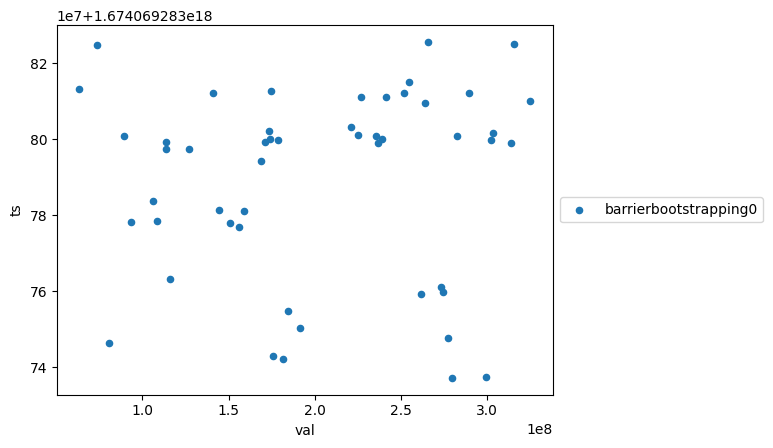

In [758]:
df = pd.DataFrame(ttprList["barrierbootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["barrierbootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

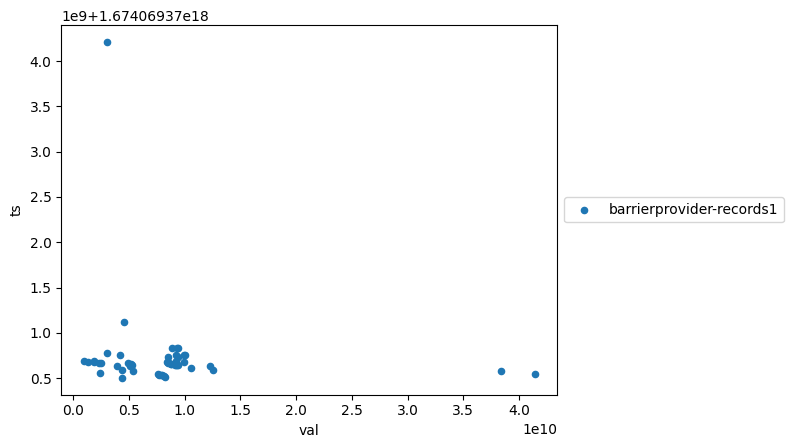

In [759]:
df = pd.DataFrame(ttprList["barrierprovider-records1"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["barrierprovider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

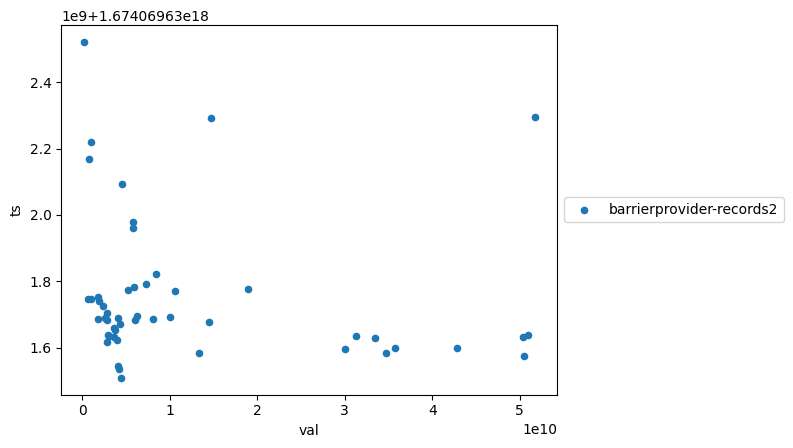

In [760]:
df = pd.DataFrame(ttprList["barrierprovider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["barrierprovider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [761]:
df = pd.DataFrame(ttprList["full bootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["full-bootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

KeyError: 'full bootstrapping0'

<Figure size 640x480 with 0 Axes>

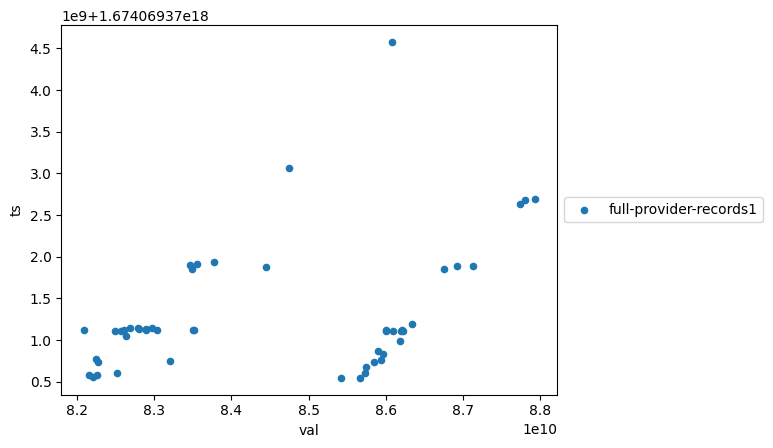

In [762]:
df = pd.DataFrame(ttprList["full-provider-records1"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["full-provider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

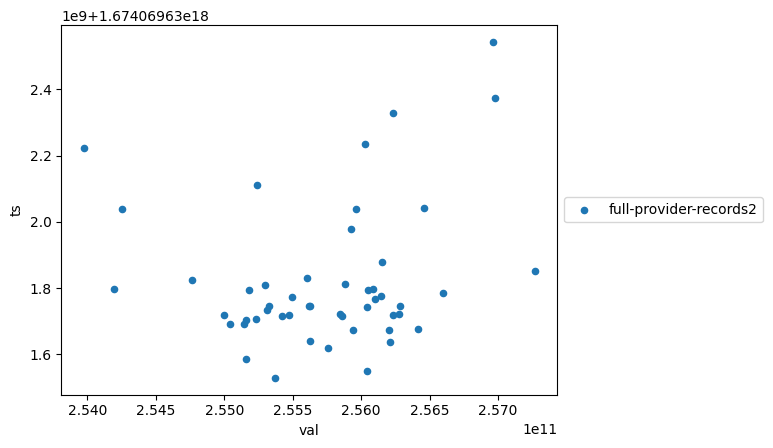

In [763]:
df = pd.DataFrame(ttprList["full-provider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["full-provider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

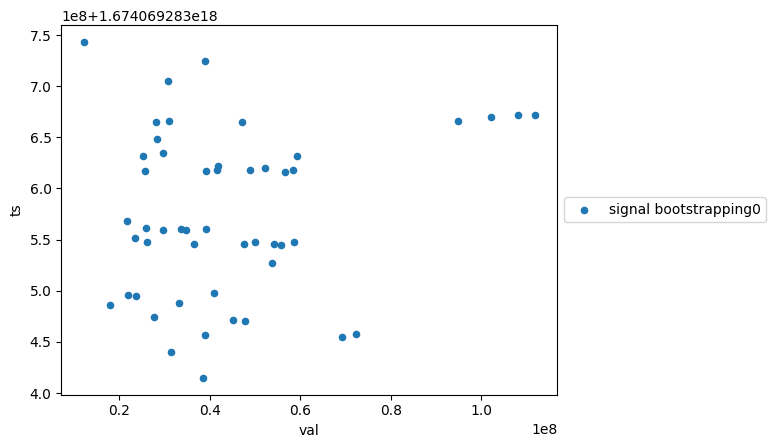

In [768]:
df = pd.DataFrame(ttprList["signal-bootstrapping0"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["signal bootstrapping0"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

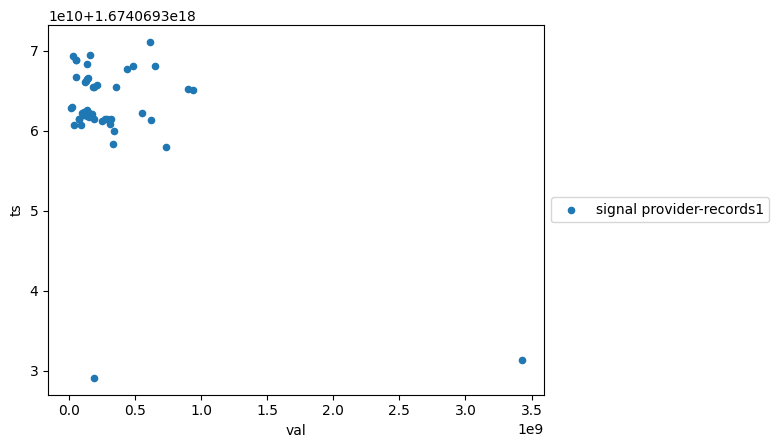

In [769]:
df = pd.DataFrame(ttprList["signal-provider-records1"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["signal provider-records1"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

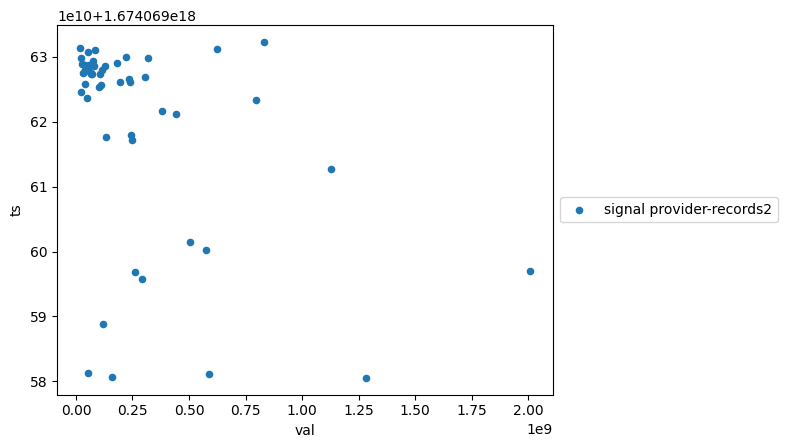

In [770]:
df = pd.DataFrame(ttprList["signal-provider-records2"])
plt.figure()
df.plot(kind="scatter", x="val", y="ts")

plt.legend(["signal provider-records2"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 640x480 with 0 Axes>

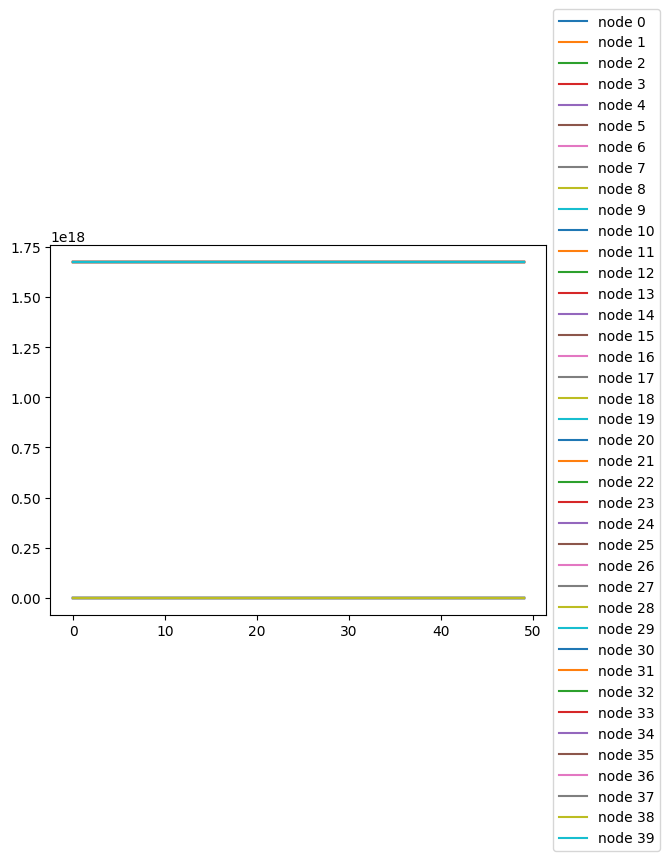

In [767]:
# conglomerated list of: peers-found | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["peers-found|done|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# conglomerated list of: peers-missing | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["peers-missing|done|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# conglomerated list of: time-to-find-first | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find-first|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# conglomerated list of: time-to-find-last | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find-last|done|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# conglomerated list of: time-to-find | done | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["time-to-find|done|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# conglomerated list of: time-to-provide-<node_number>
df1 = pd.DataFrame(ttprList["time-to-provide-0"])
df2 = pd.DataFrame(ttprList["time-to-provide-1"])
df3 = pd.DataFrame(ttprList["time-to-provide-2"])
df4 = pd.DataFrame(ttprList["time-to-provide-3"])
df5 = pd.DataFrame(ttprList["time-to-provide-4"])
df6 = pd.DataFrame(ttprList["time-to-provide-5"])
df7 = pd.DataFrame(ttprList["time-to-provide-6"])
df8 = pd.DataFrame(ttprList["time-to-provide-7"])
df9 = pd.DataFrame(ttprList["time-to-provide-8"])
df10 = pd.DataFrame(ttprList["time-to-provide-9"])
df11 = pd.DataFrame(ttprList["time-to-provide-10"])
df12 = pd.DataFrame(ttprList["time-to-provide-11"])
df13 = pd.DataFrame(ttprList["time-to-provide-12"])
df14 = pd.DataFrame(ttprList["time-to-provide-13"])
df15 = pd.DataFrame(ttprList["time-to-provide-14"])
df16 = pd.DataFrame(ttprList["time-to-provide-15"])
df17 = pd.DataFrame(ttprList["time-to-provide-16"])
df18 = pd.DataFrame(ttprList["time-to-provide-17"])
df19 = pd.DataFrame(ttprList["time-to-provide-18"])
df20 = pd.DataFrame(ttprList["time-to-provide-19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# conglomerated list of: num-hops | cypress-provider | <node_number>
df1 = pd.DataFrame(ttprList["num-hops|cypress-provider|0"])
df2 = pd.DataFrame(ttprList["num-hops|cypress-provider|1"])
df3 = pd.DataFrame(ttprList["num-hops|cypress-provider|2"])
df4 = pd.DataFrame(ttprList["num-hops|cypress-provider|3"])
df5 = pd.DataFrame(ttprList["num-hops|cypress-provider|4"])
df6 = pd.DataFrame(ttprList["num-hops|cypress-provider|5"])
df7 = pd.DataFrame(ttprList["num-hops|cypress-provider|6"])
df8 = pd.DataFrame(ttprList["num-hops|cypress-provider|7"])
df9 = pd.DataFrame(ttprList["num-hops|cypress-provider|8"])
df10 = pd.DataFrame(ttprList["num-hops|cypress-provider|9"])
df11 = pd.DataFrame(ttprList["num-hops|cypress-provider|10"])
df12 = pd.DataFrame(ttprList["num-hops|cypress-provider|11"])
df13 = pd.DataFrame(ttprList["num-hops|cypress-provider|12"])
df14 = pd.DataFrame(ttprList["num-hops|cypress-provider|13"])
df15 = pd.DataFrame(ttprList["num-hops|cypress-provider|14"])
df16 = pd.DataFrame(ttprList["num-hops|cypress-provider|15"])
df17 = pd.DataFrame(ttprList["num-hops|cypress-provider|16"])
df18 = pd.DataFrame(ttprList["num-hops|cypress-provider|17"])
df19 = pd.DataFrame(ttprList["num-hops|cypress-provider|18"])
df20 = pd.DataFrame(ttprList["num-hops|cypress-provider|19"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# aggregated Bandwidth Total In

df1 = pd.DataFrame(bandwidthStats[0]["bandwidthTotalIn"])
df2 = pd.DataFrame(bandwidthStats[1]["bandwidthTotalIn"])
df3 = pd.DataFrame(bandwidthStats[2]["bandwidthTotalIn"])
df4 = pd.DataFrame(bandwidthStats[3]["bandwidthTotalIn"])
df5 = pd.DataFrame(bandwidthStats[4]["bandwidthTotalIn"])
df6 = pd.DataFrame(bandwidthStats[5]["bandwidthTotalIn"])
df7 = pd.DataFrame(bandwidthStats[6]["bandwidthTotalIn"])
df8 = pd.DataFrame(bandwidthStats[7]["bandwidthTotalIn"])
df9 = pd.DataFrame(bandwidthStats[8]["bandwidthTotalIn"])
df10 = pd.DataFrame(bandwidthStats[9]["bandwidthTotalIn"])
df11 = pd.DataFrame(bandwidthStats[10]["bandwidthTotalIn"])
df12 = pd.DataFrame(bandwidthStats[11]["bandwidthTotalIn"])
df13 = pd.DataFrame(bandwidthStats[12]["bandwidthTotalIn"])
df14 = pd.DataFrame(bandwidthStats[13]["bandwidthTotalIn"])
df15 = pd.DataFrame(bandwidthStats[14]["bandwidthTotalIn"])
df16 = pd.DataFrame(bandwidthStats[15]["bandwidthTotalIn"])
df17 = pd.DataFrame(bandwidthStats[16]["bandwidthTotalIn"])
df18 = pd.DataFrame(bandwidthStats[17]["bandwidthTotalIn"])
df19 = pd.DataFrame(bandwidthStats[18]["bandwidthTotalIn"])
df20 = pd.DataFrame(bandwidthStats[19]["bandwidthTotalIn"])
df21 = pd.DataFrame(bandwidthStats[20]["bandwidthTotalIn"])
df22 = pd.DataFrame(bandwidthStats[21]["bandwidthTotalIn"])
df23 = pd.DataFrame(bandwidthStats[22]["bandwidthTotalIn"])
df24 = pd.DataFrame(bandwidthStats[23]["bandwidthTotalIn"])
df25 = pd.DataFrame(bandwidthStats[24]["bandwidthTotalIn"])
df26 = pd.DataFrame(bandwidthStats[25]["bandwidthTotalIn"])
df27 = pd.DataFrame(bandwidthStats[26]["bandwidthTotalIn"])
df28 = pd.DataFrame(bandwidthStats[27]["bandwidthTotalIn"])
df29 = pd.DataFrame(bandwidthStats[28]["bandwidthTotalIn"])
df30 = pd.DataFrame(bandwidthStats[29]["bandwidthTotalIn"])
df31 = pd.DataFrame(bandwidthStats[30]["bandwidthTotalIn"])
df32 = pd.DataFrame(bandwidthStats[31]["bandwidthTotalIn"])
df33 = pd.DataFrame(bandwidthStats[32]["bandwidthTotalIn"])
df34 = pd.DataFrame(bandwidthStats[33]["bandwidthTotalIn"])
df35 = pd.DataFrame(bandwidthStats[34]["bandwidthTotalIn"])
df36 = pd.DataFrame(bandwidthStats[35]["bandwidthTotalIn"])
df37 = pd.DataFrame(bandwidthStats[36]["bandwidthTotalIn"])
df38 = pd.DataFrame(bandwidthStats[37]["bandwidthTotalIn"])
df39 = pd.DataFrame(bandwidthStats[38]["bandwidthTotalIn"])
df40 = pd.DataFrame(bandwidthStats[39]["bandwidthTotalIn"])
df41 = pd.DataFrame(bandwidthStats[40]["bandwidthTotalIn"])
df42 = pd.DataFrame(bandwidthStats[41]["bandwidthTotalIn"])
df43 = pd.DataFrame(bandwidthStats[42]["bandwidthTotalIn"])
df44 = pd.DataFrame(bandwidthStats[43]["bandwidthTotalIn"])
df45 = pd.DataFrame(bandwidthStats[44]["bandwidthTotalIn"])
df46 = pd.DataFrame(bandwidthStats[45]["bandwidthTotalIn"])
df47 = pd.DataFrame(bandwidthStats[46]["bandwidthTotalIn"])
df48 = pd.DataFrame(bandwidthStats[47]["bandwidthTotalIn"])
df49 = pd.DataFrame(bandwidthStats[48]["bandwidthTotalIn"])
df50 = pd.DataFrame(bandwidthStats[49]["bandwidthTotalIn"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)
ax21 = df2.plot(ax=ax20, kind="line", rot=0)
ax22 = df2.plot(ax=ax21, kind="line", rot=0)
ax23 = df2.plot(ax=ax22, kind="line", rot=0)
ax24 = df2.plot(ax=ax23, kind="line", rot=0)
ax25 = df2.plot(ax=ax24, kind="line", rot=0)
ax26 = df2.plot(ax=ax25, kind="line", rot=0)
ax27 = df2.plot(ax=ax26, kind="line", rot=0)
ax28 = df2.plot(ax=ax27, kind="line", rot=0)
ax29 = df2.plot(ax=ax28, kind="line", rot=0)
ax30 = df2.plot(ax=ax29, kind="line", rot=0)
ax31 = df2.plot(ax=ax30, kind="line", rot=0)
ax32 = df2.plot(ax=ax31, kind="line", rot=0)
ax33 = df2.plot(ax=ax32, kind="line", rot=0)
ax34 = df2.plot(ax=ax33, kind="line", rot=0)
ax35 = df2.plot(ax=ax34, kind="line", rot=0)
ax36 = df2.plot(ax=ax35, kind="line", rot=0)
ax37 = df2.plot(ax=ax36, kind="line", rot=0)
ax38 = df2.plot(ax=ax37, kind="line", rot=0)
ax39 = df2.plot(ax=ax38, kind="line", rot=0)
ax40 = df2.plot(ax=ax39, kind="line", rot=0)
ax41 = df2.plot(ax=ax40, kind="line", rot=0)
ax42 = df2.plot(ax=ax41, kind="line", rot=0)
ax43 = df2.plot(ax=ax42, kind="line", rot=0)
ax44 = df2.plot(ax=ax43, kind="line", rot=0)
ax45 = df2.plot(ax=ax44, kind="line", rot=0)
ax46 = df2.plot(ax=ax45, kind="line", rot=0)
ax47 = df2.plot(ax=ax46, kind="line", rot=0)
ax48 = df2.plot(ax=ax47, kind="line", rot=0)
ax49 = df2.plot(ax=ax48, kind="line", rot=0)
ax50 = df2.plot(ax=ax49, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# aggregated Bandwidth Total Out

ts = adjustTimeStamps(bandwidthStats[0]["tsTotalIn"])

df1 = pd.DataFrame(bandwidthStats[0]["bandwidthTotalOut"])
df2 = pd.DataFrame(bandwidthStats[1]["bandwidthTotalOut"])
df3 = pd.DataFrame(bandwidthStats[2]["bandwidthTotalOut"])
df4 = pd.DataFrame(bandwidthStats[3]["bandwidthTotalOut"])
df5 = pd.DataFrame(bandwidthStats[4]["bandwidthTotalOut"])
df6 = pd.DataFrame(bandwidthStats[5]["bandwidthTotalOut"])
df7 = pd.DataFrame(bandwidthStats[6]["bandwidthTotalOut"])
df8 = pd.DataFrame(bandwidthStats[7]["bandwidthTotalOut"])
df9 = pd.DataFrame(bandwidthStats[8]["bandwidthTotalOut"])
df10 = pd.DataFrame(bandwidthStats[9]["bandwidthTotalOut"])
df11 = pd.DataFrame(bandwidthStats[10]["bandwidthTotalOut"])
df12 = pd.DataFrame(bandwidthStats[11]["bandwidthTotalOut"])
df13 = pd.DataFrame(bandwidthStats[12]["bandwidthTotalOut"])
df14 = pd.DataFrame(bandwidthStats[13]["bandwidthTotalOut"])
df15 = pd.DataFrame(bandwidthStats[14]["bandwidthTotalOut"])
df16 = pd.DataFrame(bandwidthStats[15]["bandwidthTotalOut"])
df17 = pd.DataFrame(bandwidthStats[16]["bandwidthTotalOut"])
df18 = pd.DataFrame(bandwidthStats[17]["bandwidthTotalOut"])
df19 = pd.DataFrame(bandwidthStats[18]["bandwidthTotalOut"])
df20 = pd.DataFrame(bandwidthStats[19]["bandwidthTotalOut"])
df21 = pd.DataFrame(bandwidthStats[20]["bandwidthTotalOut"])
df22 = pd.DataFrame(bandwidthStats[21]["bandwidthTotalOut"])
df23 = pd.DataFrame(bandwidthStats[22]["bandwidthTotalOut"])
df24 = pd.DataFrame(bandwidthStats[23]["bandwidthTotalOut"])
df25 = pd.DataFrame(bandwidthStats[24]["bandwidthTotalOut"])
df26 = pd.DataFrame(bandwidthStats[25]["bandwidthTotalOut"])
df27 = pd.DataFrame(bandwidthStats[26]["bandwidthTotalOut"])
df28 = pd.DataFrame(bandwidthStats[27]["bandwidthTotalOut"])
df29 = pd.DataFrame(bandwidthStats[28]["bandwidthTotalOut"])
df30 = pd.DataFrame(bandwidthStats[29]["bandwidthTotalOut"])
df31 = pd.DataFrame(bandwidthStats[30]["bandwidthTotalOut"])
df32 = pd.DataFrame(bandwidthStats[31]["bandwidthTotalOut"])
df33 = pd.DataFrame(bandwidthStats[32]["bandwidthTotalOut"])
df34 = pd.DataFrame(bandwidthStats[33]["bandwidthTotalOut"])
df35 = pd.DataFrame(bandwidthStats[34]["bandwidthTotalOut"])
df36 = pd.DataFrame(bandwidthStats[35]["bandwidthTotalOut"])
df37 = pd.DataFrame(bandwidthStats[36]["bandwidthTotalOut"])
df38 = pd.DataFrame(bandwidthStats[37]["bandwidthTotalOut"])
df39 = pd.DataFrame(bandwidthStats[38]["bandwidthTotalOut"])
df40 = pd.DataFrame(bandwidthStats[39]["bandwidthTotalOut"])
df41 = pd.DataFrame(bandwidthStats[40]["bandwidthTotalOut"])
df42 = pd.DataFrame(bandwidthStats[41]["bandwidthTotalOut"])
df43 = pd.DataFrame(bandwidthStats[42]["bandwidthTotalOut"])
df44 = pd.DataFrame(bandwidthStats[43]["bandwidthTotalOut"])
df45 = pd.DataFrame(bandwidthStats[44]["bandwidthTotalOut"])
df46 = pd.DataFrame(bandwidthStats[45]["bandwidthTotalOut"])
df47 = pd.DataFrame(bandwidthStats[46]["bandwidthTotalOut"])
df48 = pd.DataFrame(bandwidthStats[47]["bandwidthTotalOut"])
df49 = pd.DataFrame(bandwidthStats[48]["bandwidthTotalOut"])
df50 = pd.DataFrame(bandwidthStats[49]["bandwidthTotalOut"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)
ax21 = df2.plot(ax=ax20, kind="line", rot=0)
ax22 = df2.plot(ax=ax21, kind="line", rot=0)
ax23 = df2.plot(ax=ax22, kind="line", rot=0)
ax24 = df2.plot(ax=ax23, kind="line", rot=0)
ax25 = df2.plot(ax=ax24, kind="line", rot=0)
ax26 = df2.plot(ax=ax25, kind="line", rot=0)
ax27 = df2.plot(ax=ax26, kind="line", rot=0)
ax28 = df2.plot(ax=ax27, kind="line", rot=0)
ax29 = df2.plot(ax=ax28, kind="line", rot=0)
ax30 = df2.plot(ax=ax29, kind="line", rot=0)
ax31 = df2.plot(ax=ax30, kind="line", rot=0)
ax32 = df2.plot(ax=ax31, kind="line", rot=0)
ax33 = df2.plot(ax=ax32, kind="line", rot=0)
ax34 = df2.plot(ax=ax33, kind="line", rot=0)
ax35 = df2.plot(ax=ax34, kind="line", rot=0)
ax36 = df2.plot(ax=ax35, kind="line", rot=0)
ax37 = df2.plot(ax=ax36, kind="line", rot=0)
ax38 = df2.plot(ax=ax37, kind="line", rot=0)
ax39 = df2.plot(ax=ax38, kind="line", rot=0)
ax40 = df2.plot(ax=ax39, kind="line", rot=0)
ax41 = df2.plot(ax=ax40, kind="line", rot=0)
ax42 = df2.plot(ax=ax41, kind="line", rot=0)
ax43 = df2.plot(ax=ax42, kind="line", rot=0)
ax44 = df2.plot(ax=ax43, kind="line", rot=0)
ax45 = df2.plot(ax=ax44, kind="line", rot=0)
ax46 = df2.plot(ax=ax45, kind="line", rot=0)
ax47 = df2.plot(ax=ax46, kind="line", rot=0)
ax48 = df2.plot(ax=ax47, kind="line", rot=0)
ax49 = df2.plot(ax=ax48, kind="line", rot=0)
ax50 = df2.plot(ax=ax49, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# aggregated Bandwidth Rate In

df1 = pd.DataFrame(bandwidthStats[0]["bandwidthRateIn"])
df2 = pd.DataFrame(bandwidthStats[1]["bandwidthRateIn"])
df3 = pd.DataFrame(bandwidthStats[2]["bandwidthRateIn"])
df4 = pd.DataFrame(bandwidthStats[3]["bandwidthRateIn"])
df5 = pd.DataFrame(bandwidthStats[4]["bandwidthRateIn"])
df6 = pd.DataFrame(bandwidthStats[5]["bandwidthRateIn"])
df7 = pd.DataFrame(bandwidthStats[6]["bandwidthRateIn"])
df8 = pd.DataFrame(bandwidthStats[7]["bandwidthRateIn"])
df9 = pd.DataFrame(bandwidthStats[8]["bandwidthRateIn"])
df10 = pd.DataFrame(bandwidthStats[9]["bandwidthRateIn"])
df11 = pd.DataFrame(bandwidthStats[10]["bandwidthRateIn"])
df12 = pd.DataFrame(bandwidthStats[11]["bandwidthRateIn"])
df13 = pd.DataFrame(bandwidthStats[12]["bandwidthRateIn"])
df14 = pd.DataFrame(bandwidthStats[13]["bandwidthRateIn"])
df15 = pd.DataFrame(bandwidthStats[14]["bandwidthRateIn"])
df16 = pd.DataFrame(bandwidthStats[15]["bandwidthRateIn"])
df17 = pd.DataFrame(bandwidthStats[16]["bandwidthRateIn"])
df18 = pd.DataFrame(bandwidthStats[17]["bandwidthRateIn"])
df19 = pd.DataFrame(bandwidthStats[18]["bandwidthRateIn"])
df20 = pd.DataFrame(bandwidthStats[19]["bandwidthRateIn"])
df21 = pd.DataFrame(bandwidthStats[20]["bandwidthRateIn"])
df22 = pd.DataFrame(bandwidthStats[21]["bandwidthRateIn"])
df23 = pd.DataFrame(bandwidthStats[22]["bandwidthRateIn"])
df24 = pd.DataFrame(bandwidthStats[23]["bandwidthRateIn"])
df25 = pd.DataFrame(bandwidthStats[24]["bandwidthRateIn"])
df26 = pd.DataFrame(bandwidthStats[25]["bandwidthRateIn"])
df27 = pd.DataFrame(bandwidthStats[26]["bandwidthRateIn"])
df28 = pd.DataFrame(bandwidthStats[27]["bandwidthRateIn"])
df29 = pd.DataFrame(bandwidthStats[28]["bandwidthRateIn"])
df30 = pd.DataFrame(bandwidthStats[29]["bandwidthRateIn"])
df31 = pd.DataFrame(bandwidthStats[30]["bandwidthRateIn"])
df32 = pd.DataFrame(bandwidthStats[31]["bandwidthRateIn"])
df33 = pd.DataFrame(bandwidthStats[32]["bandwidthRateIn"])
df34 = pd.DataFrame(bandwidthStats[33]["bandwidthRateIn"])
df35 = pd.DataFrame(bandwidthStats[34]["bandwidthRateIn"])
df36 = pd.DataFrame(bandwidthStats[35]["bandwidthRateIn"])
df37 = pd.DataFrame(bandwidthStats[36]["bandwidthRateIn"])
df38 = pd.DataFrame(bandwidthStats[37]["bandwidthRateIn"])
df39 = pd.DataFrame(bandwidthStats[38]["bandwidthRateIn"])
df40 = pd.DataFrame(bandwidthStats[39]["bandwidthRateIn"])
df41 = pd.DataFrame(bandwidthStats[40]["bandwidthRateIn"])
df42 = pd.DataFrame(bandwidthStats[41]["bandwidthRateIn"])
df43 = pd.DataFrame(bandwidthStats[42]["bandwidthRateIn"])
df44 = pd.DataFrame(bandwidthStats[43]["bandwidthRateIn"])
df45 = pd.DataFrame(bandwidthStats[44]["bandwidthRateIn"])
df46 = pd.DataFrame(bandwidthStats[45]["bandwidthRateIn"])
df47 = pd.DataFrame(bandwidthStats[46]["bandwidthRateIn"])
df48 = pd.DataFrame(bandwidthStats[47]["bandwidthRateIn"])
df49 = pd.DataFrame(bandwidthStats[48]["bandwidthRateIn"])
df50 = pd.DataFrame(bandwidthStats[49]["bandwidthRateIn"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)
ax21 = df2.plot(ax=ax20, kind="line", rot=0)
ax22 = df2.plot(ax=ax21, kind="line", rot=0)
ax23 = df2.plot(ax=ax22, kind="line", rot=0)
ax24 = df2.plot(ax=ax23, kind="line", rot=0)
ax25 = df2.plot(ax=ax24, kind="line", rot=0)
ax26 = df2.plot(ax=ax25, kind="line", rot=0)
ax27 = df2.plot(ax=ax26, kind="line", rot=0)
ax28 = df2.plot(ax=ax27, kind="line", rot=0)
ax29 = df2.plot(ax=ax28, kind="line", rot=0)
ax30 = df2.plot(ax=ax29, kind="line", rot=0)
ax31 = df2.plot(ax=ax30, kind="line", rot=0)
ax32 = df2.plot(ax=ax31, kind="line", rot=0)
ax33 = df2.plot(ax=ax32, kind="line", rot=0)
ax34 = df2.plot(ax=ax33, kind="line", rot=0)
ax35 = df2.plot(ax=ax34, kind="line", rot=0)
ax36 = df2.plot(ax=ax35, kind="line", rot=0)
ax37 = df2.plot(ax=ax36, kind="line", rot=0)
ax38 = df2.plot(ax=ax37, kind="line", rot=0)
ax39 = df2.plot(ax=ax38, kind="line", rot=0)
ax40 = df2.plot(ax=ax39, kind="line", rot=0)
ax41 = df2.plot(ax=ax40, kind="line", rot=0)
ax42 = df2.plot(ax=ax41, kind="line", rot=0)
ax43 = df2.plot(ax=ax42, kind="line", rot=0)
ax44 = df2.plot(ax=ax43, kind="line", rot=0)
ax45 = df2.plot(ax=ax44, kind="line", rot=0)
ax46 = df2.plot(ax=ax45, kind="line", rot=0)
ax47 = df2.plot(ax=ax46, kind="line", rot=0)
ax48 = df2.plot(ax=ax47, kind="line", rot=0)
ax49 = df2.plot(ax=ax48, kind="line", rot=0)
ax50 = df2.plot(ax=ax49, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# aggregated Bandwidth Rate Out

df1 = pd.DataFrame(bandwidthStats[0]["bandwidthRateOut"])
df2 = pd.DataFrame(bandwidthStats[1]["bandwidthRateOut"])
df3 = pd.DataFrame(bandwidthStats[2]["bandwidthRateOut"])
df4 = pd.DataFrame(bandwidthStats[3]["bandwidthRateOut"])
df5 = pd.DataFrame(bandwidthStats[4]["bandwidthRateOut"])
df6 = pd.DataFrame(bandwidthStats[5]["bandwidthRateOut"])
df7 = pd.DataFrame(bandwidthStats[6]["bandwidthRateOut"])
df8 = pd.DataFrame(bandwidthStats[7]["bandwidthRateOut"])
df9 = pd.DataFrame(bandwidthStats[8]["bandwidthRateOut"])
df10 = pd.DataFrame(bandwidthStats[9]["bandwidthRateOut"])
df11 = pd.DataFrame(bandwidthStats[10]["bandwidthRateOut"])
df12 = pd.DataFrame(bandwidthStats[11]["bandwidthRateOut"])
df13 = pd.DataFrame(bandwidthStats[12]["bandwidthRateOut"])
df14 = pd.DataFrame(bandwidthStats[13]["bandwidthRateOut"])
df15 = pd.DataFrame(bandwidthStats[14]["bandwidthRateOut"])
df16 = pd.DataFrame(bandwidthStats[15]["bandwidthRateOut"])
df17 = pd.DataFrame(bandwidthStats[16]["bandwidthRateOut"])
df18 = pd.DataFrame(bandwidthStats[17]["bandwidthRateOut"])
df19 = pd.DataFrame(bandwidthStats[18]["bandwidthRateOut"])
df20 = pd.DataFrame(bandwidthStats[19]["bandwidthRateOut"])
df21 = pd.DataFrame(bandwidthStats[20]["bandwidthRateOut"])
df22 = pd.DataFrame(bandwidthStats[21]["bandwidthRateOut"])
df23 = pd.DataFrame(bandwidthStats[22]["bandwidthRateOut"])
df24 = pd.DataFrame(bandwidthStats[23]["bandwidthRateOut"])
df25 = pd.DataFrame(bandwidthStats[24]["bandwidthRateOut"])
df26 = pd.DataFrame(bandwidthStats[25]["bandwidthRateOut"])
df27 = pd.DataFrame(bandwidthStats[26]["bandwidthRateOut"])
df28 = pd.DataFrame(bandwidthStats[27]["bandwidthRateOut"])
df29 = pd.DataFrame(bandwidthStats[28]["bandwidthRateOut"])
df30 = pd.DataFrame(bandwidthStats[29]["bandwidthRateOut"])
df31 = pd.DataFrame(bandwidthStats[30]["bandwidthRateOut"])
df32 = pd.DataFrame(bandwidthStats[31]["bandwidthRateOut"])
df33 = pd.DataFrame(bandwidthStats[32]["bandwidthRateOut"])
df34 = pd.DataFrame(bandwidthStats[33]["bandwidthRateOut"])
df35 = pd.DataFrame(bandwidthStats[34]["bandwidthRateOut"])
df36 = pd.DataFrame(bandwidthStats[35]["bandwidthRateOut"])
df37 = pd.DataFrame(bandwidthStats[36]["bandwidthRateOut"])
df38 = pd.DataFrame(bandwidthStats[37]["bandwidthRateOut"])
df39 = pd.DataFrame(bandwidthStats[38]["bandwidthRateOut"])
df40 = pd.DataFrame(bandwidthStats[39]["bandwidthRateOut"])
df41 = pd.DataFrame(bandwidthStats[40]["bandwidthRateOut"])
df42 = pd.DataFrame(bandwidthStats[41]["bandwidthRateOut"])
df43 = pd.DataFrame(bandwidthStats[42]["bandwidthRateOut"])
df44 = pd.DataFrame(bandwidthStats[43]["bandwidthRateOut"])
df45 = pd.DataFrame(bandwidthStats[44]["bandwidthRateOut"])
df46 = pd.DataFrame(bandwidthStats[45]["bandwidthRateOut"])
df47 = pd.DataFrame(bandwidthStats[46]["bandwidthRateOut"])
df48 = pd.DataFrame(bandwidthStats[47]["bandwidthRateOut"])
df49 = pd.DataFrame(bandwidthStats[48]["bandwidthRateOut"])
df50 = pd.DataFrame(bandwidthStats[49]["bandwidthRateOut"])

plt.figure()

ax1 = df1.plot(kind="line", rot=0)
ax2 = df2.plot(ax=ax1, kind="line", rot=0)
ax3 = df3.plot(ax=ax2, kind="line", rot=0)
ax4 = df4.plot(ax=ax3, kind="line", rot=0)
ax5 = df5.plot(ax=ax4, kind="line", rot=0)
ax6 = df2.plot(ax=ax5, kind="line", rot=0)
ax7 = df2.plot(ax=ax6, kind="line", rot=0)
ax8 = df2.plot(ax=ax7, kind="line", rot=0)
ax9 = df2.plot(ax=ax8, kind="line", rot=0)
ax10 = df2.plot(ax=ax9, kind="line", rot=0)
ax11 = df2.plot(ax=ax10, kind="line", rot=0)
ax12 = df2.plot(ax=ax11, kind="line", rot=0)
ax13 = df2.plot(ax=ax12, kind="line", rot=0)
ax14 = df2.plot(ax=ax13, kind="line", rot=0)
ax15 = df2.plot(ax=ax14, kind="line", rot=0)
ax16 = df2.plot(ax=ax15, kind="line", rot=0)
ax17 = df2.plot(ax=ax16, kind="line", rot=0)
ax18 = df2.plot(ax=ax17, kind="line", rot=0)
ax19 = df2.plot(ax=ax18, kind="line", rot=0)
ax20 = df2.plot(ax=ax19, kind="line", rot=0)
ax21 = df2.plot(ax=ax20, kind="line", rot=0)
ax22 = df2.plot(ax=ax21, kind="line", rot=0)
ax23 = df2.plot(ax=ax22, kind="line", rot=0)
ax24 = df2.plot(ax=ax23, kind="line", rot=0)
ax25 = df2.plot(ax=ax24, kind="line", rot=0)
ax26 = df2.plot(ax=ax25, kind="line", rot=0)
ax27 = df2.plot(ax=ax26, kind="line", rot=0)
ax28 = df2.plot(ax=ax27, kind="line", rot=0)
ax29 = df2.plot(ax=ax28, kind="line", rot=0)
ax30 = df2.plot(ax=ax29, kind="line", rot=0)
ax31 = df2.plot(ax=ax30, kind="line", rot=0)
ax32 = df2.plot(ax=ax31, kind="line", rot=0)
ax33 = df2.plot(ax=ax32, kind="line", rot=0)
ax34 = df2.plot(ax=ax33, kind="line", rot=0)
ax35 = df2.plot(ax=ax34, kind="line", rot=0)
ax36 = df2.plot(ax=ax35, kind="line", rot=0)
ax37 = df2.plot(ax=ax36, kind="line", rot=0)
ax38 = df2.plot(ax=ax37, kind="line", rot=0)
ax39 = df2.plot(ax=ax38, kind="line", rot=0)
ax40 = df2.plot(ax=ax39, kind="line", rot=0)
ax41 = df2.plot(ax=ax40, kind="line", rot=0)
ax42 = df2.plot(ax=ax41, kind="line", rot=0)
ax43 = df2.plot(ax=ax42, kind="line", rot=0)
ax44 = df2.plot(ax=ax43, kind="line", rot=0)
ax45 = df2.plot(ax=ax44, kind="line", rot=0)
ax46 = df2.plot(ax=ax45, kind="line", rot=0)
ax47 = df2.plot(ax=ax46, kind="line", rot=0)
ax48 = df2.plot(ax=ax47, kind="line", rot=0)
ax49 = df2.plot(ax=ax48, kind="line", rot=0)
ax50 = df2.plot(ax=ax49, kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
####### NODE DIAGNOSTICS PARSING #######

In [ ]:
# EnableGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["EnableGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["EnableGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["EnableGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["EnableGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["EnableGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["EnableGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["EnableGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["EnableGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["EnableGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["EnableGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["EnableGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["EnableGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["EnableGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["EnableGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["EnableGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["EnableGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["EnableGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["EnableGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["EnableGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["EnableGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["EnableGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["EnableGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["EnableGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["EnableGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["EnableGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["EnableGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["EnableGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["EnableGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["EnableGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["EnableGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["EnableGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["EnableGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["EnableGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["EnableGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["EnableGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["EnableGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["EnableGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["EnableGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["EnableGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["EnableGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["EnableGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["EnableGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["EnableGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["EnableGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["EnableGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["EnableGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["EnableGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["EnableGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["EnableGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["EnableGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# HeapAlloc aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapAlloc"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapAlloc"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapAlloc"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapAlloc"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapAlloc"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapAlloc"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapAlloc"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapAlloc"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapAlloc"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapAlloc"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapAlloc"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapAlloc"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapAlloc"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapAlloc"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapAlloc"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapAlloc"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapAlloc"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapAlloc"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapAlloc"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapAlloc"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapAlloc"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapAlloc"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapAlloc"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapAlloc"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapAlloc"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapAlloc"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapAlloc"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapAlloc"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapAlloc"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapAlloc"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapAlloc"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapAlloc"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapAlloc"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapAlloc"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapAlloc"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapAlloc"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapAlloc"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapAlloc"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapAlloc"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapAlloc"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapAlloc"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapAlloc"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapAlloc"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapAlloc"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapAlloc"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapAlloc"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapAlloc"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapAlloc"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapAlloc"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapAlloc"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# LastGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["LastGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["LastGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["LastGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["LastGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["LastGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["LastGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["LastGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["LastGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["LastGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["LastGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["LastGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["LastGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["LastGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["LastGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["LastGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["LastGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["LastGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["LastGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["LastGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["LastGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["LastGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["LastGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["LastGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["LastGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["LastGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["LastGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["LastGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["LastGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["LastGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["LastGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["LastGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["LastGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["LastGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["LastGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["LastGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["LastGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["LastGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["LastGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["LastGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["LastGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["LastGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["LastGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["LastGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["LastGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["LastGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["LastGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["LastGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["LastGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["LastGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["LastGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NumGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# MCacheSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["MCacheSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["MCacheSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["MCacheSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["MCacheSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["MCacheSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["MCacheSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["MCacheSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["MCacheSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["MCacheSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["MCacheSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["MCacheSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["MCacheSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["MCacheSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["MCacheSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["MCacheSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["MCacheSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["MCacheSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["MCacheSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["MCacheSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["MCacheSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["MCacheSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["MCacheSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["MCacheSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["MCacheSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["MCacheSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["MCacheSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["MCacheSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["MCacheSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["MCacheSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["MCacheSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["MCacheSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["MCacheSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["MCacheSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["MCacheSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["MCacheSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["MCacheSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["MCacheSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["MCacheSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["MCacheSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["MCacheSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["MCacheSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["MCacheSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["MCacheSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["MCacheSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["MCacheSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["MCacheSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["MCacheSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["MCacheSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["MCacheSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["MCacheSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# StackSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["StackSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["StackSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["StackSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["StackSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["StackSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["StackSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["StackSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["StackSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["StackSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["StackSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["StackSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["StackSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["StackSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["StackSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["StackSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["StackSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["StackSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["StackSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["StackSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["StackSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["StackSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["StackSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["StackSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["StackSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["StackSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["StackSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["StackSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["StackSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["StackSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["StackSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["StackSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["StackSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["StackSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["StackSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["StackSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["StackSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["StackSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["StackSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["StackSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["StackSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["StackSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["StackSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["StackSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["StackSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["StackSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["StackSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["StackSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["StackSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["StackSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["StackSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# StackInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["StackInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["StackInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["StackInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["StackInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["StackInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["StackInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["StackInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["StackInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["StackInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["StackInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["StackInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["StackInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["StackInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["StackInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["StackInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["StackInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["StackInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["StackInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["StackInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["StackInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["StackInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["StackInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["StackInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["StackInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["StackInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["StackInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["StackInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["StackInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["StackInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["StackInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["StackInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["StackInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["StackInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["StackInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["StackInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["StackInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["StackInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["StackInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["StackInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["StackInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["StackInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["StackInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["StackInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["StackInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["StackInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["StackInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["StackInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["StackInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["StackInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["StackInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# Sys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Sys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Sys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Sys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Sys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Sys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Sys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Sys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Sys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Sys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Sys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Sys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Sys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Sys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Sys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Sys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Sys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Sys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Sys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Sys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Sys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Sys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Sys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Sys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Sys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Sys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Sys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Sys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Sys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Sys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Sys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Sys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Sys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Sys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Sys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Sys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Sys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Sys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Sys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Sys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Sys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Sys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Sys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Sys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Sys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Sys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Sys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Sys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Sys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Sys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Sys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NumThread aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumThread"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumThread"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumThread"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumThread"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumThread"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumThread"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumThread"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumThread"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumThread"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumThread"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumThread"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumThread"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumThread"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumThread"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumThread"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumThread"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumThread"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumThread"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumThread"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumThread"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumThread"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumThread"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumThread"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumThread"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumThread"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumThread"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumThread"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumThread"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumThread"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumThread"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumThread"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumThread"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumThread"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumThread"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumThread"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumThread"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumThread"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumThread"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumThread"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumThread"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumThread"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumThread"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumThread"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumThread"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumThread"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumThread"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumThread"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumThread"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumThread"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumThread"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NumThread aggregated data plotting Vanilla

# DH run1; 50 nodes
runId="run1"
path="./data/metrics/vanilla/"+runId+"/cypress-provider/"
filename="/diagnostics.out"
nodeNum=50

parseDiagnostics(runId, path, filename, nodeNum)

df1 = pd.DataFrame(nodeDiagnostics[0]["NumThread"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumThread"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumThread"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumThread"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumThread"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumThread"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumThread"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumThread"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumThread"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumThread"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumThread"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumThread"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumThread"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumThread"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumThread"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumThread"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumThread"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumThread"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumThread"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumThread"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumThread"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumThread"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumThread"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumThread"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumThread"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumThread"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumThread"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumThread"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumThread"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumThread"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumThread"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumThread"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumThread"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumThread"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumThread"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumThread"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumThread"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumThread"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumThread"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumThread"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumThread"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumThread"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumThread"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumThread"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumThread"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumThread"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumThread"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumThread"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumThread"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumThread"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# HeapIdle aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapIdle"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapIdle"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapIdle"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapIdle"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapIdle"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapIdle"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapIdle"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapIdle"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapIdle"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapIdle"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapIdle"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapIdle"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapIdle"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapIdle"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapIdle"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapIdle"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapIdle"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapIdle"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapIdle"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapIdle"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapIdle"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapIdle"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapIdle"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapIdle"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapIdle"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapIdle"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapIdle"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapIdle"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapIdle"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapIdle"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapIdle"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapIdle"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapIdle"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapIdle"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapIdle"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapIdle"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapIdle"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapIdle"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapIdle"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapIdle"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapIdle"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapIdle"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapIdle"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapIdle"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapIdle"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapIdle"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapIdle"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapIdle"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapIdle"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapIdle"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# HeapInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# Lookups aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Lookups"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Lookups"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Lookups"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Lookups"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Lookups"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Lookups"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Lookups"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Lookups"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Lookups"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Lookups"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Lookups"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Lookups"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Lookups"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Lookups"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Lookups"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Lookups"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Lookups"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Lookups"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Lookups"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Lookups"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Lookups"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Lookups"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Lookups"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Lookups"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Lookups"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Lookups"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Lookups"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Lookups"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Lookups"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Lookups"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Lookups"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Lookups"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Lookups"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Lookups"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Lookups"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Lookups"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Lookups"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Lookups"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Lookups"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Lookups"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Lookups"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Lookups"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Lookups"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Lookups"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Lookups"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Lookups"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Lookups"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Lookups"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Lookups"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Lookups"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# MSpanInuse aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["MSpanInuse"])
df2 = pd.DataFrame(nodeDiagnostics[1]["MSpanInuse"])
df3 = pd.DataFrame(nodeDiagnostics[2]["MSpanInuse"])
df4 = pd.DataFrame(nodeDiagnostics[3]["MSpanInuse"])
df5 = pd.DataFrame(nodeDiagnostics[4]["MSpanInuse"])
df6 = pd.DataFrame(nodeDiagnostics[5]["MSpanInuse"])
df7 = pd.DataFrame(nodeDiagnostics[6]["MSpanInuse"])
df8 = pd.DataFrame(nodeDiagnostics[7]["MSpanInuse"])
df9 = pd.DataFrame(nodeDiagnostics[8]["MSpanInuse"])
df10 = pd.DataFrame(nodeDiagnostics[9]["MSpanInuse"])
df11 = pd.DataFrame(nodeDiagnostics[10]["MSpanInuse"])
df12 = pd.DataFrame(nodeDiagnostics[11]["MSpanInuse"])
df13 = pd.DataFrame(nodeDiagnostics[12]["MSpanInuse"])
df14 = pd.DataFrame(nodeDiagnostics[13]["MSpanInuse"])
df15 = pd.DataFrame(nodeDiagnostics[14]["MSpanInuse"])
df16 = pd.DataFrame(nodeDiagnostics[15]["MSpanInuse"])
df17 = pd.DataFrame(nodeDiagnostics[16]["MSpanInuse"])
df18 = pd.DataFrame(nodeDiagnostics[17]["MSpanInuse"])
df19 = pd.DataFrame(nodeDiagnostics[18]["MSpanInuse"])
df20 = pd.DataFrame(nodeDiagnostics[19]["MSpanInuse"])
df21 = pd.DataFrame(nodeDiagnostics[20]["MSpanInuse"])
df22 = pd.DataFrame(nodeDiagnostics[21]["MSpanInuse"])
df23 = pd.DataFrame(nodeDiagnostics[22]["MSpanInuse"])
df24 = pd.DataFrame(nodeDiagnostics[23]["MSpanInuse"])
df25 = pd.DataFrame(nodeDiagnostics[24]["MSpanInuse"])
df26 = pd.DataFrame(nodeDiagnostics[25]["MSpanInuse"])
df27 = pd.DataFrame(nodeDiagnostics[26]["MSpanInuse"])
df28 = pd.DataFrame(nodeDiagnostics[27]["MSpanInuse"])
df29 = pd.DataFrame(nodeDiagnostics[28]["MSpanInuse"])
df30 = pd.DataFrame(nodeDiagnostics[29]["MSpanInuse"])
df31 = pd.DataFrame(nodeDiagnostics[30]["MSpanInuse"])
df32 = pd.DataFrame(nodeDiagnostics[31]["MSpanInuse"])
df33 = pd.DataFrame(nodeDiagnostics[32]["MSpanInuse"])
df34 = pd.DataFrame(nodeDiagnostics[33]["MSpanInuse"])
df35 = pd.DataFrame(nodeDiagnostics[34]["MSpanInuse"])
df36 = pd.DataFrame(nodeDiagnostics[35]["MSpanInuse"])
df37 = pd.DataFrame(nodeDiagnostics[36]["MSpanInuse"])
df38 = pd.DataFrame(nodeDiagnostics[37]["MSpanInuse"])
df39 = pd.DataFrame(nodeDiagnostics[38]["MSpanInuse"])
df40 = pd.DataFrame(nodeDiagnostics[39]["MSpanInuse"])
df41 = pd.DataFrame(nodeDiagnostics[40]["MSpanInuse"])
df42 = pd.DataFrame(nodeDiagnostics[41]["MSpanInuse"])
df43 = pd.DataFrame(nodeDiagnostics[42]["MSpanInuse"])
df44 = pd.DataFrame(nodeDiagnostics[43]["MSpanInuse"])
df45 = pd.DataFrame(nodeDiagnostics[44]["MSpanInuse"])
df46 = pd.DataFrame(nodeDiagnostics[45]["MSpanInuse"])
df47 = pd.DataFrame(nodeDiagnostics[46]["MSpanInuse"])
df48 = pd.DataFrame(nodeDiagnostics[47]["MSpanInuse"])
df49 = pd.DataFrame(nodeDiagnostics[48]["MSpanInuse"])
df50 = pd.DataFrame(nodeDiagnostics[49]["MSpanInuse"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# Frees aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["Frees"])
df2 = pd.DataFrame(nodeDiagnostics[1]["Frees"])
df3 = pd.DataFrame(nodeDiagnostics[2]["Frees"])
df4 = pd.DataFrame(nodeDiagnostics[3]["Frees"])
df5 = pd.DataFrame(nodeDiagnostics[4]["Frees"])
df6 = pd.DataFrame(nodeDiagnostics[5]["Frees"])
df7 = pd.DataFrame(nodeDiagnostics[6]["Frees"])
df8 = pd.DataFrame(nodeDiagnostics[7]["Frees"])
df9 = pd.DataFrame(nodeDiagnostics[8]["Frees"])
df10 = pd.DataFrame(nodeDiagnostics[9]["Frees"])
df11 = pd.DataFrame(nodeDiagnostics[10]["Frees"])
df12 = pd.DataFrame(nodeDiagnostics[11]["Frees"])
df13 = pd.DataFrame(nodeDiagnostics[12]["Frees"])
df14 = pd.DataFrame(nodeDiagnostics[13]["Frees"])
df15 = pd.DataFrame(nodeDiagnostics[14]["Frees"])
df16 = pd.DataFrame(nodeDiagnostics[15]["Frees"])
df17 = pd.DataFrame(nodeDiagnostics[16]["Frees"])
df18 = pd.DataFrame(nodeDiagnostics[17]["Frees"])
df19 = pd.DataFrame(nodeDiagnostics[18]["Frees"])
df20 = pd.DataFrame(nodeDiagnostics[19]["Frees"])
df21 = pd.DataFrame(nodeDiagnostics[20]["Frees"])
df22 = pd.DataFrame(nodeDiagnostics[21]["Frees"])
df23 = pd.DataFrame(nodeDiagnostics[22]["Frees"])
df24 = pd.DataFrame(nodeDiagnostics[23]["Frees"])
df25 = pd.DataFrame(nodeDiagnostics[24]["Frees"])
df26 = pd.DataFrame(nodeDiagnostics[25]["Frees"])
df27 = pd.DataFrame(nodeDiagnostics[26]["Frees"])
df28 = pd.DataFrame(nodeDiagnostics[27]["Frees"])
df29 = pd.DataFrame(nodeDiagnostics[28]["Frees"])
df30 = pd.DataFrame(nodeDiagnostics[29]["Frees"])
df31 = pd.DataFrame(nodeDiagnostics[30]["Frees"])
df32 = pd.DataFrame(nodeDiagnostics[31]["Frees"])
df33 = pd.DataFrame(nodeDiagnostics[32]["Frees"])
df34 = pd.DataFrame(nodeDiagnostics[33]["Frees"])
df35 = pd.DataFrame(nodeDiagnostics[34]["Frees"])
df36 = pd.DataFrame(nodeDiagnostics[35]["Frees"])
df37 = pd.DataFrame(nodeDiagnostics[36]["Frees"])
df38 = pd.DataFrame(nodeDiagnostics[37]["Frees"])
df39 = pd.DataFrame(nodeDiagnostics[38]["Frees"])
df40 = pd.DataFrame(nodeDiagnostics[39]["Frees"])
df41 = pd.DataFrame(nodeDiagnostics[40]["Frees"])
df42 = pd.DataFrame(nodeDiagnostics[41]["Frees"])
df43 = pd.DataFrame(nodeDiagnostics[42]["Frees"])
df44 = pd.DataFrame(nodeDiagnostics[43]["Frees"])
df45 = pd.DataFrame(nodeDiagnostics[44]["Frees"])
df46 = pd.DataFrame(nodeDiagnostics[45]["Frees"])
df47 = pd.DataFrame(nodeDiagnostics[46]["Frees"])
df48 = pd.DataFrame(nodeDiagnostics[47]["Frees"])
df49 = pd.DataFrame(nodeDiagnostics[48]["Frees"])
df50 = pd.DataFrame(nodeDiagnostics[49]["Frees"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NextGC aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NextGC"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NextGC"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NextGC"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NextGC"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NextGC"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NextGC"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NextGC"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NextGC"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NextGC"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NextGC"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NextGC"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NextGC"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NextGC"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NextGC"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NextGC"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NextGC"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NextGC"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NextGC"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NextGC"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NextGC"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NextGC"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NextGC"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NextGC"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NextGC"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NextGC"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NextGC"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NextGC"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NextGC"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NextGC"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NextGC"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NextGC"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NextGC"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NextGC"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NextGC"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NextGC"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NextGC"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NextGC"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NextGC"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NextGC"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NextGC"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NextGC"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NextGC"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NextGC"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NextGC"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NextGC"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NextGC"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NextGC"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NextGC"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NextGC"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NextGC"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NumCgoCall aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumCgoCall"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumCgoCall"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumCgoCall"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumCgoCall"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumCgoCall"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumCgoCall"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumCgoCall"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumCgoCall"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumCgoCall"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumCgoCall"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumCgoCall"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumCgoCall"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumCgoCall"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumCgoCall"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumCgoCall"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumCgoCall"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumCgoCall"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumCgoCall"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumCgoCall"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumCgoCall"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumCgoCall"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumCgoCall"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumCgoCall"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumCgoCall"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumCgoCall"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumCgoCall"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumCgoCall"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumCgoCall"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumCgoCall"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumCgoCall"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumCgoCall"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumCgoCall"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumCgoCall"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumCgoCall"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumCgoCall"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumCgoCall"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumCgoCall"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumCgoCall"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumCgoCall"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumCgoCall"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumCgoCall"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumCgoCall"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumCgoCall"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumCgoCall"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumCgoCall"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumCgoCall"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumCgoCall"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumCgoCall"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumCgoCall"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumCgoCall"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# PauseTotalNs aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["PauseTotalNs"])
df2 = pd.DataFrame(nodeDiagnostics[1]["PauseTotalNs"])
df3 = pd.DataFrame(nodeDiagnostics[2]["PauseTotalNs"])
df4 = pd.DataFrame(nodeDiagnostics[3]["PauseTotalNs"])
df5 = pd.DataFrame(nodeDiagnostics[4]["PauseTotalNs"])
df6 = pd.DataFrame(nodeDiagnostics[5]["PauseTotalNs"])
df7 = pd.DataFrame(nodeDiagnostics[6]["PauseTotalNs"])
df8 = pd.DataFrame(nodeDiagnostics[7]["PauseTotalNs"])
df9 = pd.DataFrame(nodeDiagnostics[8]["PauseTotalNs"])
df10 = pd.DataFrame(nodeDiagnostics[9]["PauseTotalNs"])
df11 = pd.DataFrame(nodeDiagnostics[10]["PauseTotalNs"])
df12 = pd.DataFrame(nodeDiagnostics[11]["PauseTotalNs"])
df13 = pd.DataFrame(nodeDiagnostics[12]["PauseTotalNs"])
df14 = pd.DataFrame(nodeDiagnostics[13]["PauseTotalNs"])
df15 = pd.DataFrame(nodeDiagnostics[14]["PauseTotalNs"])
df16 = pd.DataFrame(nodeDiagnostics[15]["PauseTotalNs"])
df17 = pd.DataFrame(nodeDiagnostics[16]["PauseTotalNs"])
df18 = pd.DataFrame(nodeDiagnostics[17]["PauseTotalNs"])
df19 = pd.DataFrame(nodeDiagnostics[18]["PauseTotalNs"])
df20 = pd.DataFrame(nodeDiagnostics[19]["PauseTotalNs"])
df21 = pd.DataFrame(nodeDiagnostics[20]["PauseTotalNs"])
df22 = pd.DataFrame(nodeDiagnostics[21]["PauseTotalNs"])
df23 = pd.DataFrame(nodeDiagnostics[22]["PauseTotalNs"])
df24 = pd.DataFrame(nodeDiagnostics[23]["PauseTotalNs"])
df25 = pd.DataFrame(nodeDiagnostics[24]["PauseTotalNs"])
df26 = pd.DataFrame(nodeDiagnostics[25]["PauseTotalNs"])
df27 = pd.DataFrame(nodeDiagnostics[26]["PauseTotalNs"])
df28 = pd.DataFrame(nodeDiagnostics[27]["PauseTotalNs"])
df29 = pd.DataFrame(nodeDiagnostics[28]["PauseTotalNs"])
df30 = pd.DataFrame(nodeDiagnostics[29]["PauseTotalNs"])
df31 = pd.DataFrame(nodeDiagnostics[30]["PauseTotalNs"])
df32 = pd.DataFrame(nodeDiagnostics[31]["PauseTotalNs"])
df33 = pd.DataFrame(nodeDiagnostics[32]["PauseTotalNs"])
df34 = pd.DataFrame(nodeDiagnostics[33]["PauseTotalNs"])
df35 = pd.DataFrame(nodeDiagnostics[34]["PauseTotalNs"])
df36 = pd.DataFrame(nodeDiagnostics[35]["PauseTotalNs"])
df37 = pd.DataFrame(nodeDiagnostics[36]["PauseTotalNs"])
df38 = pd.DataFrame(nodeDiagnostics[37]["PauseTotalNs"])
df39 = pd.DataFrame(nodeDiagnostics[38]["PauseTotalNs"])
df40 = pd.DataFrame(nodeDiagnostics[39]["PauseTotalNs"])
df41 = pd.DataFrame(nodeDiagnostics[40]["PauseTotalNs"])
df42 = pd.DataFrame(nodeDiagnostics[41]["PauseTotalNs"])
df43 = pd.DataFrame(nodeDiagnostics[42]["PauseTotalNs"])
df44 = pd.DataFrame(nodeDiagnostics[43]["PauseTotalNs"])
df45 = pd.DataFrame(nodeDiagnostics[44]["PauseTotalNs"])
df46 = pd.DataFrame(nodeDiagnostics[45]["PauseTotalNs"])
df47 = pd.DataFrame(nodeDiagnostics[46]["PauseTotalNs"])
df48 = pd.DataFrame(nodeDiagnostics[47]["PauseTotalNs"])
df49 = pd.DataFrame(nodeDiagnostics[48]["PauseTotalNs"])
df50 = pd.DataFrame(nodeDiagnostics[49]["PauseTotalNs"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# NumGoroutine aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["NumGoroutine"])
df2 = pd.DataFrame(nodeDiagnostics[1]["NumGoroutine"])
df3 = pd.DataFrame(nodeDiagnostics[2]["NumGoroutine"])
df4 = pd.DataFrame(nodeDiagnostics[3]["NumGoroutine"])
df5 = pd.DataFrame(nodeDiagnostics[4]["NumGoroutine"])
df6 = pd.DataFrame(nodeDiagnostics[5]["NumGoroutine"])
df7 = pd.DataFrame(nodeDiagnostics[6]["NumGoroutine"])
df8 = pd.DataFrame(nodeDiagnostics[7]["NumGoroutine"])
df9 = pd.DataFrame(nodeDiagnostics[8]["NumGoroutine"])
df10 = pd.DataFrame(nodeDiagnostics[9]["NumGoroutine"])
df11 = pd.DataFrame(nodeDiagnostics[10]["NumGoroutine"])
df12 = pd.DataFrame(nodeDiagnostics[11]["NumGoroutine"])
df13 = pd.DataFrame(nodeDiagnostics[12]["NumGoroutine"])
df14 = pd.DataFrame(nodeDiagnostics[13]["NumGoroutine"])
df15 = pd.DataFrame(nodeDiagnostics[14]["NumGoroutine"])
df16 = pd.DataFrame(nodeDiagnostics[15]["NumGoroutine"])
df17 = pd.DataFrame(nodeDiagnostics[16]["NumGoroutine"])
df18 = pd.DataFrame(nodeDiagnostics[17]["NumGoroutine"])
df19 = pd.DataFrame(nodeDiagnostics[18]["NumGoroutine"])
df20 = pd.DataFrame(nodeDiagnostics[19]["NumGoroutine"])
df21 = pd.DataFrame(nodeDiagnostics[20]["NumGoroutine"])
df22 = pd.DataFrame(nodeDiagnostics[21]["NumGoroutine"])
df23 = pd.DataFrame(nodeDiagnostics[22]["NumGoroutine"])
df24 = pd.DataFrame(nodeDiagnostics[23]["NumGoroutine"])
df25 = pd.DataFrame(nodeDiagnostics[24]["NumGoroutine"])
df26 = pd.DataFrame(nodeDiagnostics[25]["NumGoroutine"])
df27 = pd.DataFrame(nodeDiagnostics[26]["NumGoroutine"])
df28 = pd.DataFrame(nodeDiagnostics[27]["NumGoroutine"])
df29 = pd.DataFrame(nodeDiagnostics[28]["NumGoroutine"])
df30 = pd.DataFrame(nodeDiagnostics[29]["NumGoroutine"])
df31 = pd.DataFrame(nodeDiagnostics[30]["NumGoroutine"])
df32 = pd.DataFrame(nodeDiagnostics[31]["NumGoroutine"])
df33 = pd.DataFrame(nodeDiagnostics[32]["NumGoroutine"])
df34 = pd.DataFrame(nodeDiagnostics[33]["NumGoroutine"])
df35 = pd.DataFrame(nodeDiagnostics[34]["NumGoroutine"])
df36 = pd.DataFrame(nodeDiagnostics[35]["NumGoroutine"])
df37 = pd.DataFrame(nodeDiagnostics[36]["NumGoroutine"])
df38 = pd.DataFrame(nodeDiagnostics[37]["NumGoroutine"])
df39 = pd.DataFrame(nodeDiagnostics[38]["NumGoroutine"])
df40 = pd.DataFrame(nodeDiagnostics[39]["NumGoroutine"])
df41 = pd.DataFrame(nodeDiagnostics[40]["NumGoroutine"])
df42 = pd.DataFrame(nodeDiagnostics[41]["NumGoroutine"])
df43 = pd.DataFrame(nodeDiagnostics[42]["NumGoroutine"])
df44 = pd.DataFrame(nodeDiagnostics[43]["NumGoroutine"])
df45 = pd.DataFrame(nodeDiagnostics[44]["NumGoroutine"])
df46 = pd.DataFrame(nodeDiagnostics[45]["NumGoroutine"])
df47 = pd.DataFrame(nodeDiagnostics[46]["NumGoroutine"])
df48 = pd.DataFrame(nodeDiagnostics[47]["NumGoroutine"])
df49 = pd.DataFrame(nodeDiagnostics[48]["NumGoroutine"])
df50 = pd.DataFrame(nodeDiagnostics[49]["NumGoroutine"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# BuckHashSys aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["BuckHashSys"])
df2 = pd.DataFrame(nodeDiagnostics[1]["BuckHashSys"])
df3 = pd.DataFrame(nodeDiagnostics[2]["BuckHashSys"])
df4 = pd.DataFrame(nodeDiagnostics[3]["BuckHashSys"])
df5 = pd.DataFrame(nodeDiagnostics[4]["BuckHashSys"])
df6 = pd.DataFrame(nodeDiagnostics[5]["BuckHashSys"])
df7 = pd.DataFrame(nodeDiagnostics[6]["BuckHashSys"])
df8 = pd.DataFrame(nodeDiagnostics[7]["BuckHashSys"])
df9 = pd.DataFrame(nodeDiagnostics[8]["BuckHashSys"])
df10 = pd.DataFrame(nodeDiagnostics[9]["BuckHashSys"])
df11 = pd.DataFrame(nodeDiagnostics[10]["BuckHashSys"])
df12 = pd.DataFrame(nodeDiagnostics[11]["BuckHashSys"])
df13 = pd.DataFrame(nodeDiagnostics[12]["BuckHashSys"])
df14 = pd.DataFrame(nodeDiagnostics[13]["BuckHashSys"])
df15 = pd.DataFrame(nodeDiagnostics[14]["BuckHashSys"])
df16 = pd.DataFrame(nodeDiagnostics[15]["BuckHashSys"])
df17 = pd.DataFrame(nodeDiagnostics[16]["BuckHashSys"])
df18 = pd.DataFrame(nodeDiagnostics[17]["BuckHashSys"])
df19 = pd.DataFrame(nodeDiagnostics[18]["BuckHashSys"])
df20 = pd.DataFrame(nodeDiagnostics[19]["BuckHashSys"])
df21 = pd.DataFrame(nodeDiagnostics[20]["BuckHashSys"])
df22 = pd.DataFrame(nodeDiagnostics[21]["BuckHashSys"])
df23 = pd.DataFrame(nodeDiagnostics[22]["BuckHashSys"])
df24 = pd.DataFrame(nodeDiagnostics[23]["BuckHashSys"])
df25 = pd.DataFrame(nodeDiagnostics[24]["BuckHashSys"])
df26 = pd.DataFrame(nodeDiagnostics[25]["BuckHashSys"])
df27 = pd.DataFrame(nodeDiagnostics[26]["BuckHashSys"])
df28 = pd.DataFrame(nodeDiagnostics[27]["BuckHashSys"])
df29 = pd.DataFrame(nodeDiagnostics[28]["BuckHashSys"])
df30 = pd.DataFrame(nodeDiagnostics[29]["BuckHashSys"])
df31 = pd.DataFrame(nodeDiagnostics[30]["BuckHashSys"])
df32 = pd.DataFrame(nodeDiagnostics[31]["BuckHashSys"])
df33 = pd.DataFrame(nodeDiagnostics[32]["BuckHashSys"])
df34 = pd.DataFrame(nodeDiagnostics[33]["BuckHashSys"])
df35 = pd.DataFrame(nodeDiagnostics[34]["BuckHashSys"])
df36 = pd.DataFrame(nodeDiagnostics[35]["BuckHashSys"])
df37 = pd.DataFrame(nodeDiagnostics[36]["BuckHashSys"])
df38 = pd.DataFrame(nodeDiagnostics[37]["BuckHashSys"])
df39 = pd.DataFrame(nodeDiagnostics[38]["BuckHashSys"])
df40 = pd.DataFrame(nodeDiagnostics[39]["BuckHashSys"])
df41 = pd.DataFrame(nodeDiagnostics[40]["BuckHashSys"])
df42 = pd.DataFrame(nodeDiagnostics[41]["BuckHashSys"])
df43 = pd.DataFrame(nodeDiagnostics[42]["BuckHashSys"])
df44 = pd.DataFrame(nodeDiagnostics[43]["BuckHashSys"])
df45 = pd.DataFrame(nodeDiagnostics[44]["BuckHashSys"])
df46 = pd.DataFrame(nodeDiagnostics[45]["BuckHashSys"])
df47 = pd.DataFrame(nodeDiagnostics[46]["BuckHashSys"])
df48 = pd.DataFrame(nodeDiagnostics[47]["BuckHashSys"])
df49 = pd.DataFrame(nodeDiagnostics[48]["BuckHashSys"])
df50 = pd.DataFrame(nodeDiagnostics[49]["BuckHashSys"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
# HeapObjects aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapObjects"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapObjects"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapObjects"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapObjects"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapObjects"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapObjects"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapObjects"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapObjects"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapObjects"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapObjects"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapObjects"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapObjects"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapObjects"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapObjects"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapObjects"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapObjects"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapObjects"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapObjects"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapObjects"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapObjects"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapObjects"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapObjects"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapObjects"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapObjects"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapObjects"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapObjects"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapObjects"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapObjects"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapObjects"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapObjects"])
df31 = pd.DataFrame(nodeDiagnostics[30]["HeapObjects"])
df32 = pd.DataFrame(nodeDiagnostics[31]["HeapObjects"])
df33 = pd.DataFrame(nodeDiagnostics[32]["HeapObjects"])
df34 = pd.DataFrame(nodeDiagnostics[33]["HeapObjects"])
df35 = pd.DataFrame(nodeDiagnostics[34]["HeapObjects"])
df36 = pd.DataFrame(nodeDiagnostics[35]["HeapObjects"])
df37 = pd.DataFrame(nodeDiagnostics[36]["HeapObjects"])
df38 = pd.DataFrame(nodeDiagnostics[37]["HeapObjects"])
df39 = pd.DataFrame(nodeDiagnostics[38]["HeapObjects"])
df40 = pd.DataFrame(nodeDiagnostics[39]["HeapObjects"])
df41 = pd.DataFrame(nodeDiagnostics[40]["HeapObjects"])
df42 = pd.DataFrame(nodeDiagnostics[41]["HeapObjects"])
df43 = pd.DataFrame(nodeDiagnostics[42]["HeapObjects"])
df44 = pd.DataFrame(nodeDiagnostics[43]["HeapObjects"])
df45 = pd.DataFrame(nodeDiagnostics[44]["HeapObjects"])
df46 = pd.DataFrame(nodeDiagnostics[45]["HeapObjects"])
df47 = pd.DataFrame(nodeDiagnostics[46]["HeapObjects"])
df48 = pd.DataFrame(nodeDiagnostics[47]["HeapObjects"])
df49 = pd.DataFrame(nodeDiagnostics[48]["HeapObjects"])
df50 = pd.DataFrame(nodeDiagnostics[49]["HeapObjects"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)
ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)
ax31 = df2.plot(ax=ax30, x="ts", y="val", kind="line", rot=0)
ax32 = df2.plot(ax=ax31, x="ts", y="val", kind="line", rot=0)
ax33 = df2.plot(ax=ax32, x="ts", y="val", kind="line", rot=0)
ax34 = df2.plot(ax=ax33, x="ts", y="val", kind="line", rot=0)
ax35 = df2.plot(ax=ax34, x="ts", y="val", kind="line", rot=0)
ax36 = df2.plot(ax=ax35, x="ts", y="val", kind="line", rot=0)
ax37 = df2.plot(ax=ax36, x="ts", y="val", kind="line", rot=0)
ax38 = df2.plot(ax=ax37, x="ts", y="val", kind="line", rot=0)
ax39 = df2.plot(ax=ax38, x="ts", y="val", kind="line", rot=0)
ax40 = df2.plot(ax=ax39, x="ts", y="val", kind="line", rot=0)
ax41 = df2.plot(ax=ax40, x="ts", y="val", kind="line", rot=0)
ax42 = df2.plot(ax=ax41, x="ts", y="val", kind="line", rot=0)
ax43 = df2.plot(ax=ax42, x="ts", y="val", kind="line", rot=0)
ax44 = df2.plot(ax=ax43, x="ts", y="val", kind="line", rot=0)
ax45 = df2.plot(ax=ax44, x="ts", y="val", kind="line", rot=0)
ax46 = df2.plot(ax=ax45, x="ts", y="val", kind="line", rot=0)
ax47 = df2.plot(ax=ax46, x="ts", y="val", kind="line", rot=0)
ax48 = df2.plot(ax=ax47, x="ts", y="val", kind="line", rot=0)
ax49 = df2.plot(ax=ax48, x="ts", y="val", kind="line", rot=0)
ax50 = df2.plot(ax=ax49, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30', 'node 31', 'node 32', 'node 33', 'node 34', 'node 35',
    'node 36', 'node 37', 'node 38', 'node 39', 'node 40', 'node 41',
    'node 42', 'node 43', 'node 44', 'node 45', 'node 46', 'node 47',
    'node 48', 'node 49', 'node 50'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
